In [1]:
suppressMessages({
    library(feather)
    library(data.table)
    library(dplyr)
    library(ggplot2)
    library(reshape2)
    library(parallel)
    library(fpc)
    library(splines)
    library(doSNOW)
    library(itertools)
})

ac_data <- read_feather("full_ac_data.feather")

In [2]:
# Boundaries
min_lon = -78
max_lon = -68
min_lat = 35
max_lat = 45

In [3]:
df1 <- ac_data[ac_data$V16 == "2D3070" & ac_data$V19 == "EAL3070", ]
nrow(df1)

[1] 372

# Exploring aircraft (plural) with V16_V19="2D3070_EAL3070"

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


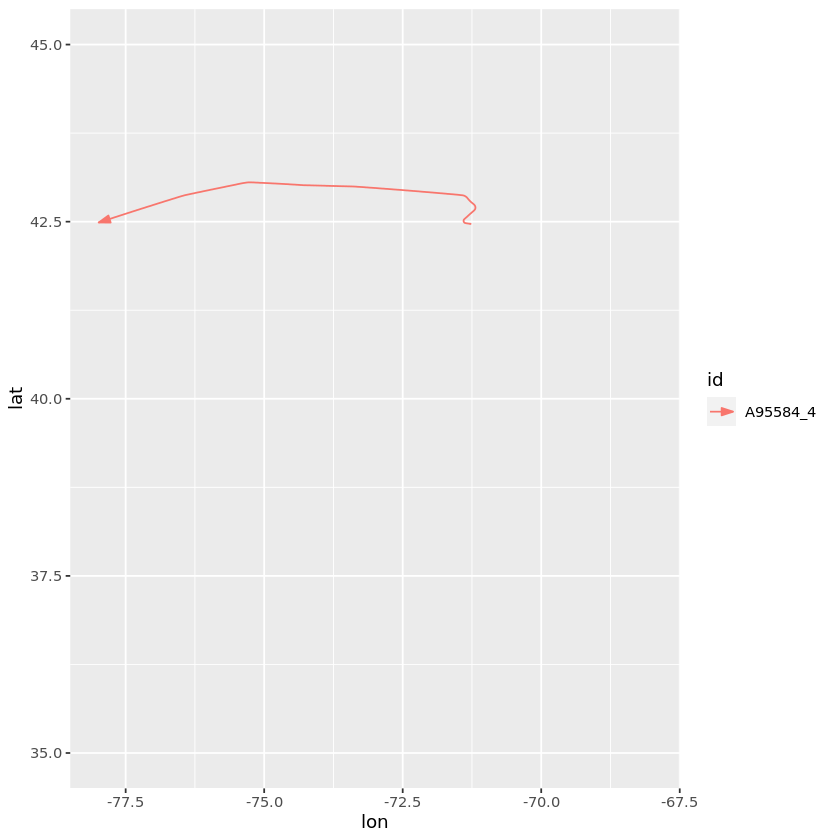

In [4]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = id)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


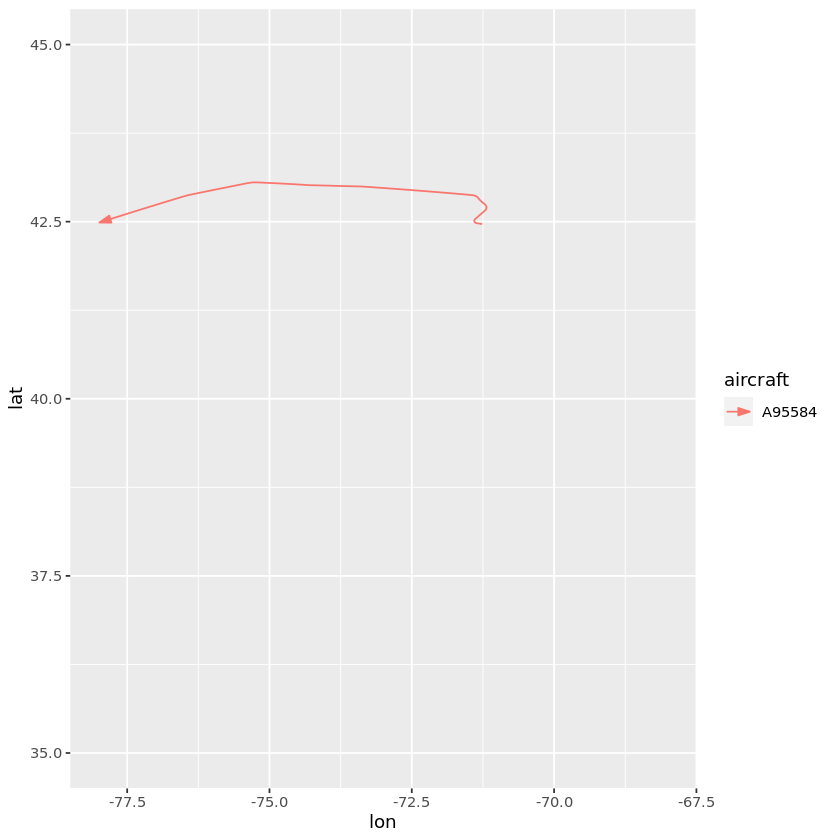

In [5]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = aircraft)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


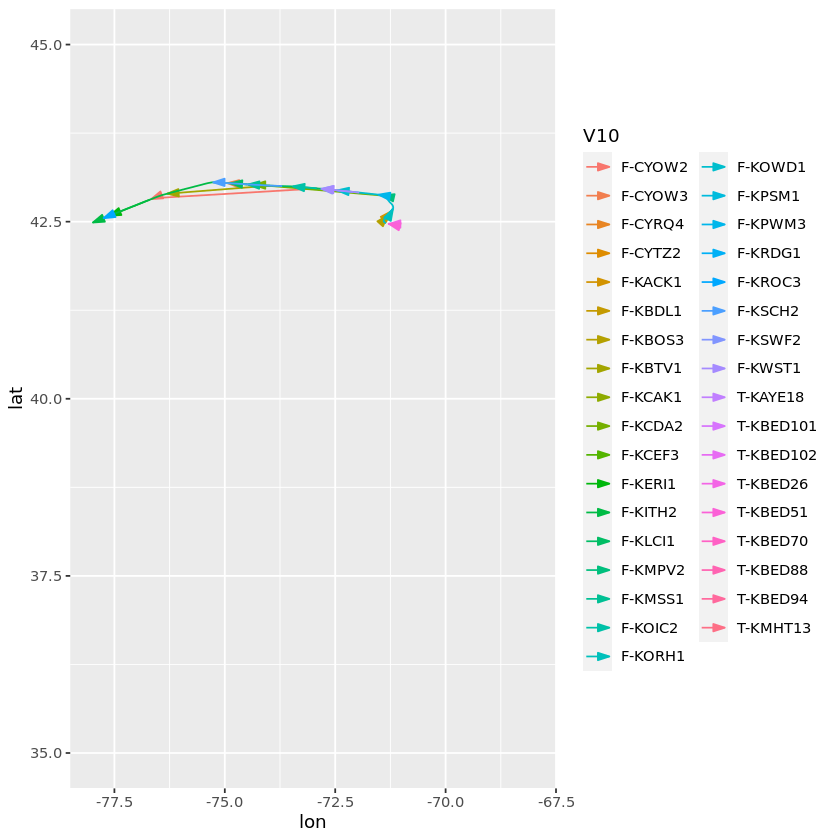

In [6]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = V10)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


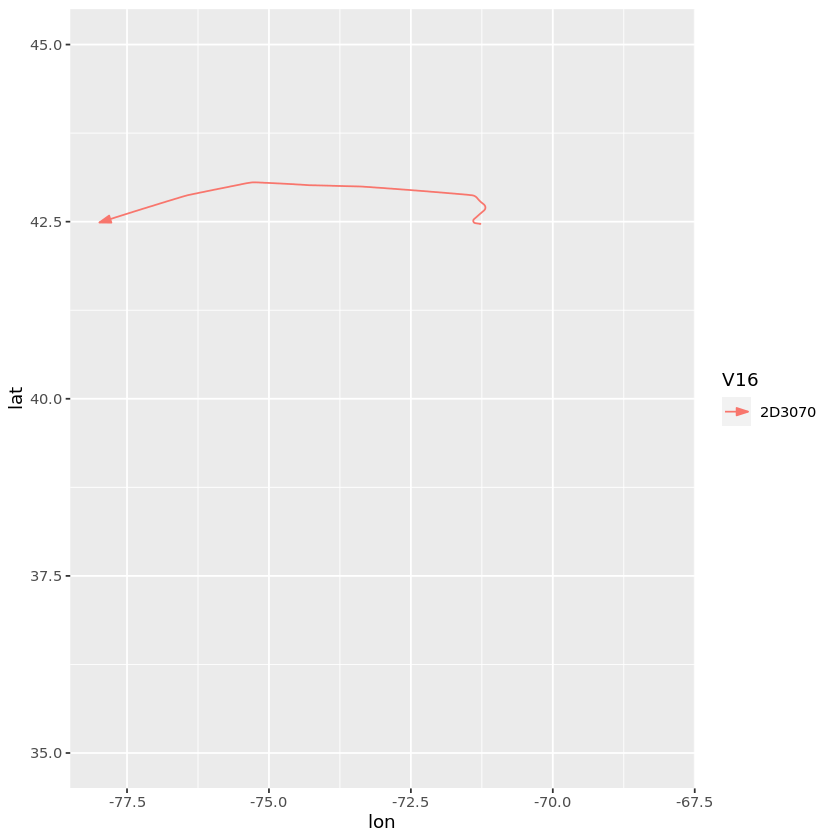

In [7]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = V16)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


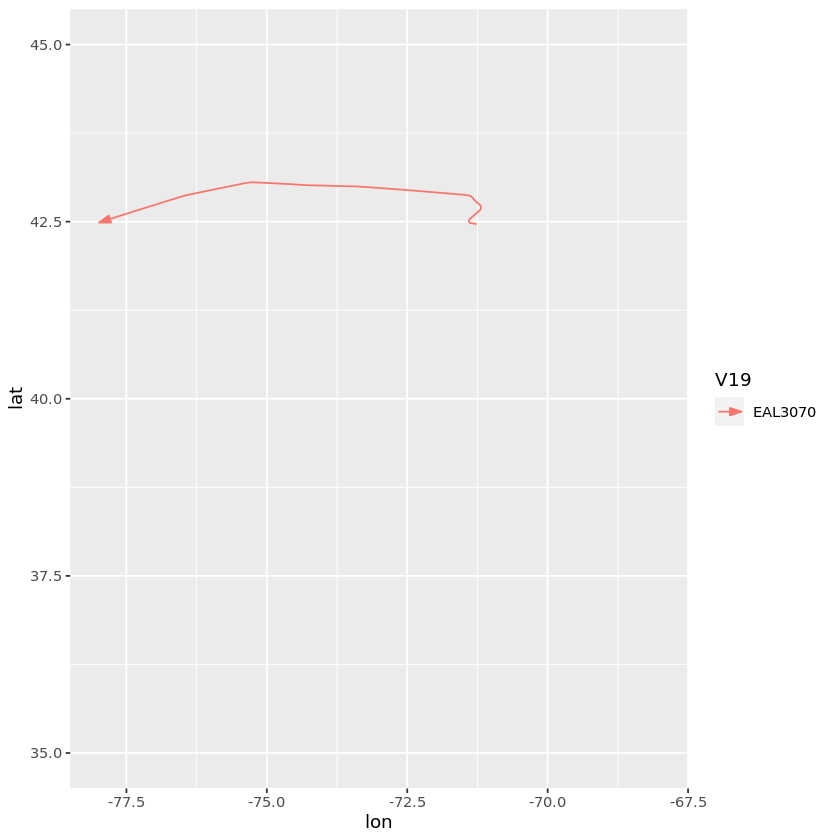

In [8]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = V19)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

# Exploring aircraft 01008C

In [9]:
df1 <- ac_data[ac_data$aircraft == "01008C", ]
nrow(df1)

[1] 763

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


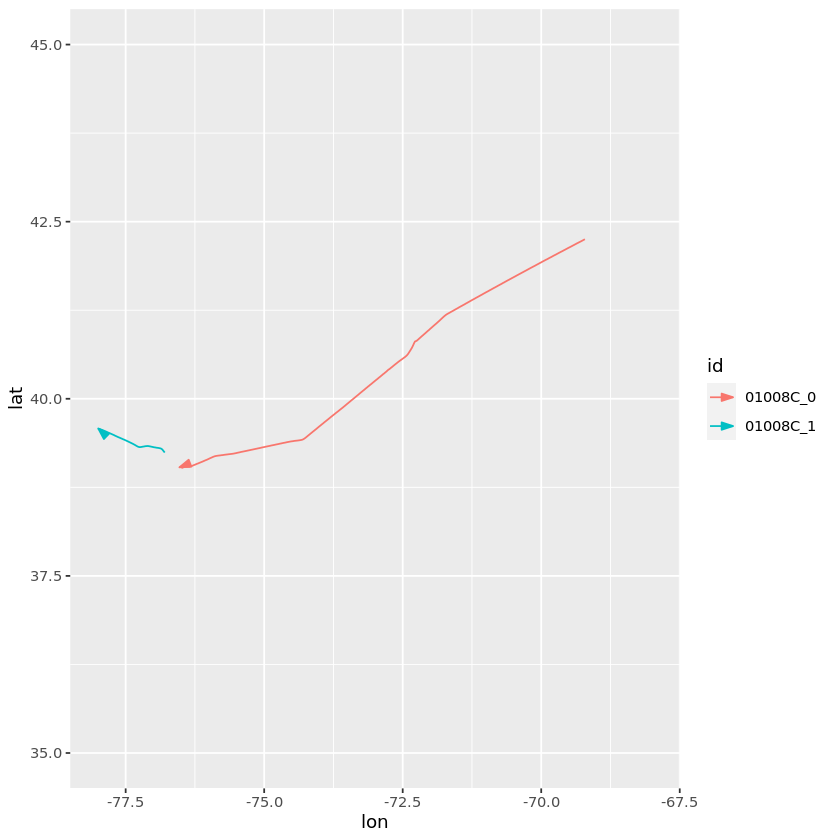

In [10]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = id)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


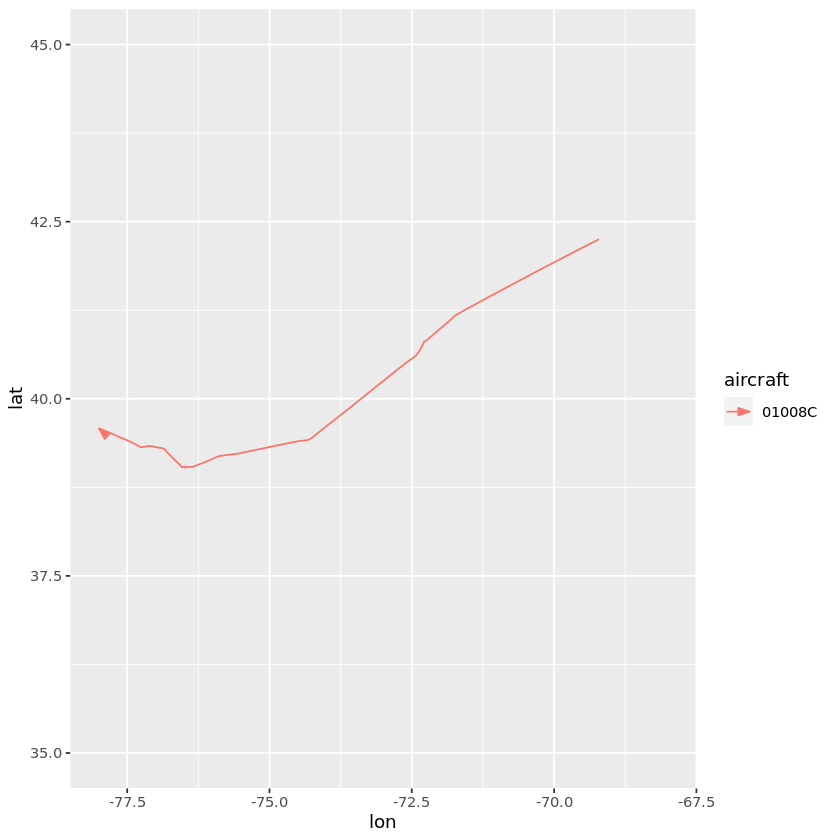

In [11]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = aircraft)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


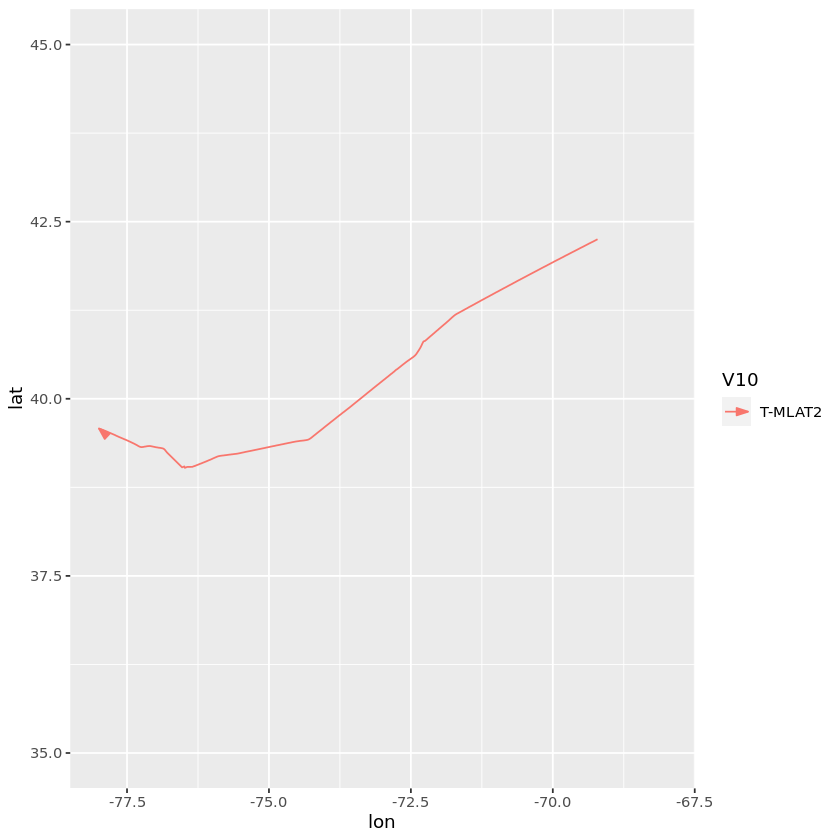

In [12]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = V10)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


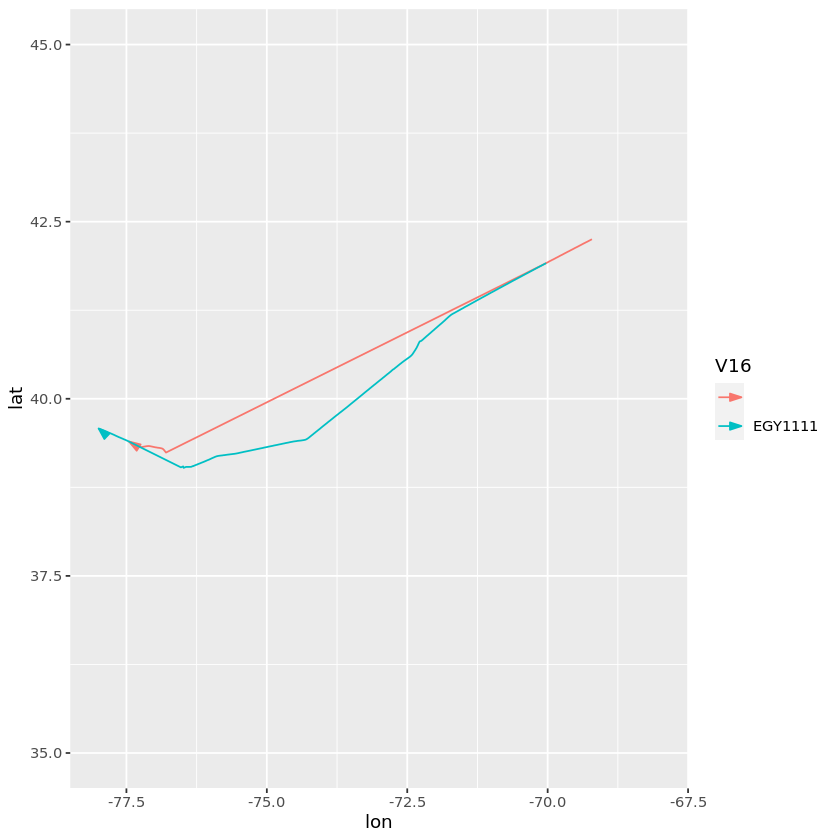

In [13]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = V16)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

Warning message in geom_path(data = df1, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


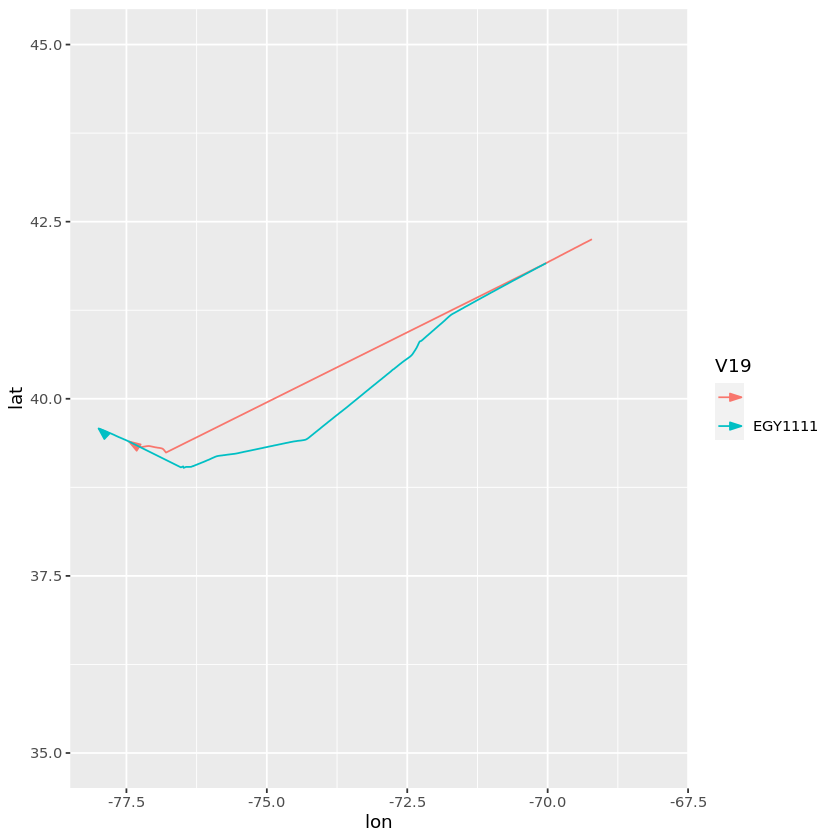

In [14]:
ggplot() + geom_path(data = df1, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = V19)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

# Exploring the first aircraft

Warning message in geom_path(data = ac_df, arrow = arrow(type = "closed", angle = 18, :
“Ignoring unknown aesthetics: frame”


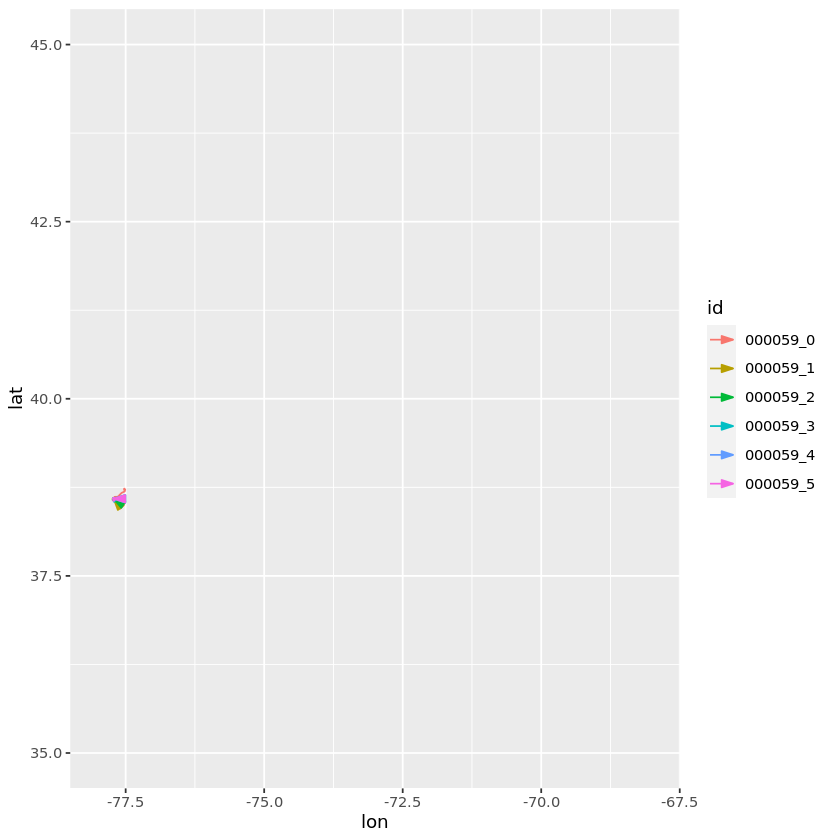

In [15]:
ac_df <- ac_data[ac_data$aircraft == ac_data$aircraft[1], ]
ggplot() + geom_path(data = ac_df, arrow = arrow(type = "closed", angle = 18,
                                               length = unit(0.1, "inches")),
                     aes(x = lon, y = lat, frame = ts, color = id)) +
xlim(c(min_lon, max_lon)) +
ylim(c(min_lat, max_lat))

In [16]:
ac_df[ac_df$id == paste0(df1$aircraft[1], "_1"), ]
nrow(ac_df)

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


aircraft,ts,V1,V2,lat,lon,azimuth,altitude,ground_speed,V9,⋯,id_cluster,max_ac_altitude,num_uniq_alt_id,num_uniq_cluster,most_frequent_altitude_1,most_frequent_altitude_2,num_ac_samples,num_ids,num_alts,num_id_clusters
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>


[1] 613

In [17]:
colnames(ac_data)

[1] "aircraft"                     "ts"                          
 [3] "V1"                           "V2"                          
 [5] "lat"                          "lon"                         
 [7] "azimuth"                      "altitude"                    
 [9] "ground_speed"                 "V9"                          
[11] "V10"                          "aircraft_type"               
[13] "V12"                          "source"                      
[15] "destination"                  "V16"                         
[17] "ground_flag"                  "climb_rate"                  
[19] "V19"                          "V20"                         
[21] "V21"                          "ts_readable"                 
[23] "quadrant"                     "last_lat"                    
[25] "last_lon"                     "last_azimuth"                
[27] "last_altitude"                "last_ts"                     
[29] "last_source"                  "last_destination"            
[31] "last_V9"                      "last_ground_flag"            
[33] "last_quadrant"                "last_ground_speed"           
[35] "last_V2"                      "next_lat"                    
[37] "next_lon"                     "next_azimuth"                
[39] "next_altitude"                "next_ts"                     
[41] "next_source"                  "next_destination"            
[43] "next_V9"                      "next_ground_flag"            
[45] "next_quadrant"                "next_ground_speed"           
[47] "next_V2"                      "uniq_source"                 
[49] "uniq_destination"             "max_ac_alt"                  
[51] "last_ts_diff"                 "next_ts_diff"                
[53] "est_climb_rate"               "climb_rate_ratio"            
[55] "quadrant_change"              "touchdown_id"                
[57] "max_touchdown"                "max_altitude_touchdown_id"   
[59] "next_touchdown_ts"            "touchdown_time_diff"         
[61] "touchdown"                    "airport"                     
[63] "landed"                       "entered"                     
[65] "expired"                      "landed_or_entered_or_expired"
[67] "num_id"                       "id"                          
[69] "max_alt_ac_id"                "q99_alt_ac_id"               
[71] "max_99_ratio"                 "last_touchdown"              
[73] "next_touchdown"               "last_entered"                
[75] "next_entered"                 "last_airport"                
[77] "next_airport"                 "ts_scaled"                   
[79] "lon_scaled"                   "lat_scaled"                  
[81] "alt_scaled"                   "id_cluster"                  
[83] "max_ac_altitude"              "num_uniq_alt_id"             
[85] "num_uniq_cluster"             "most_frequent_altitude_1"    
[87] "most_frequent_altitude_2"     "num_ac_samples"              
[89] "num_ids"                      "num_alts"                    
[91] "num_id_clusters"

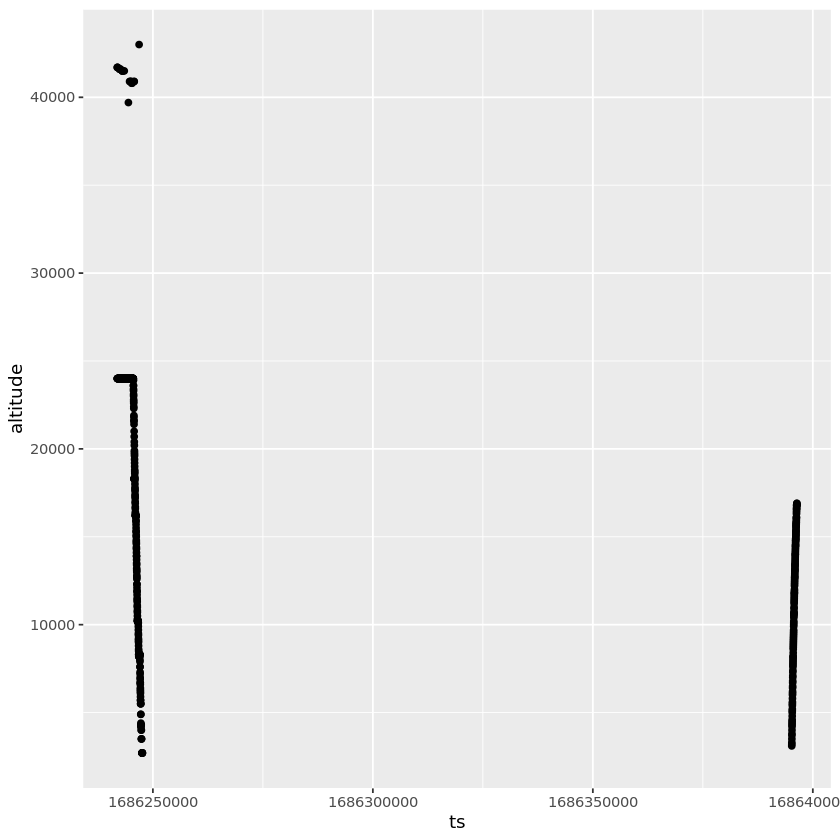

In [18]:
ggplot(df1, aes(x = ts, y = altitude)) + geom_point()

install.packages("fpc")

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


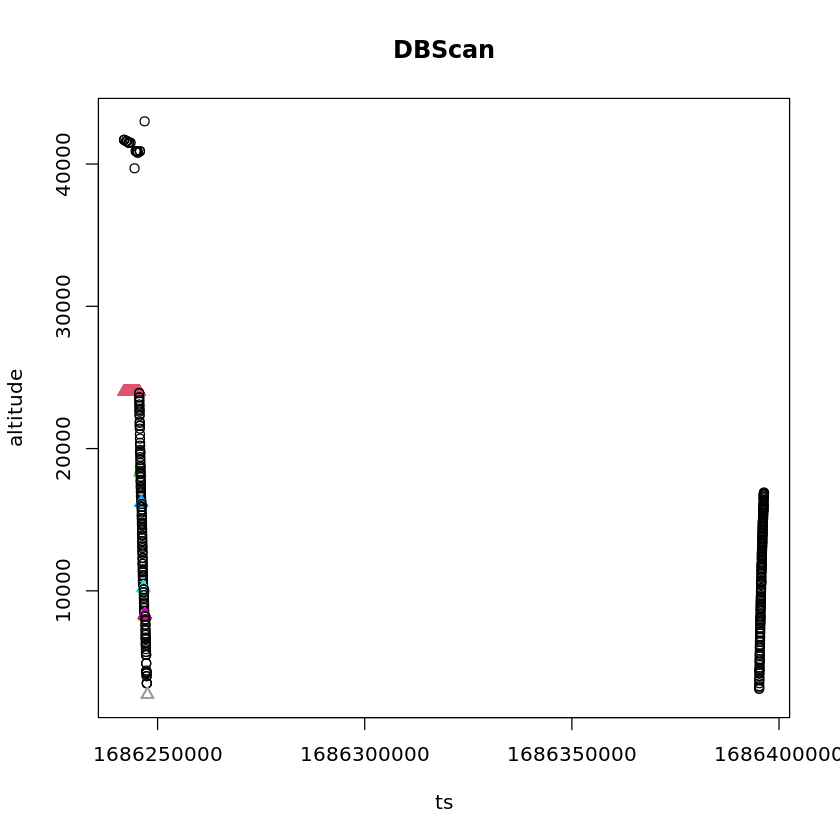

[1] 6


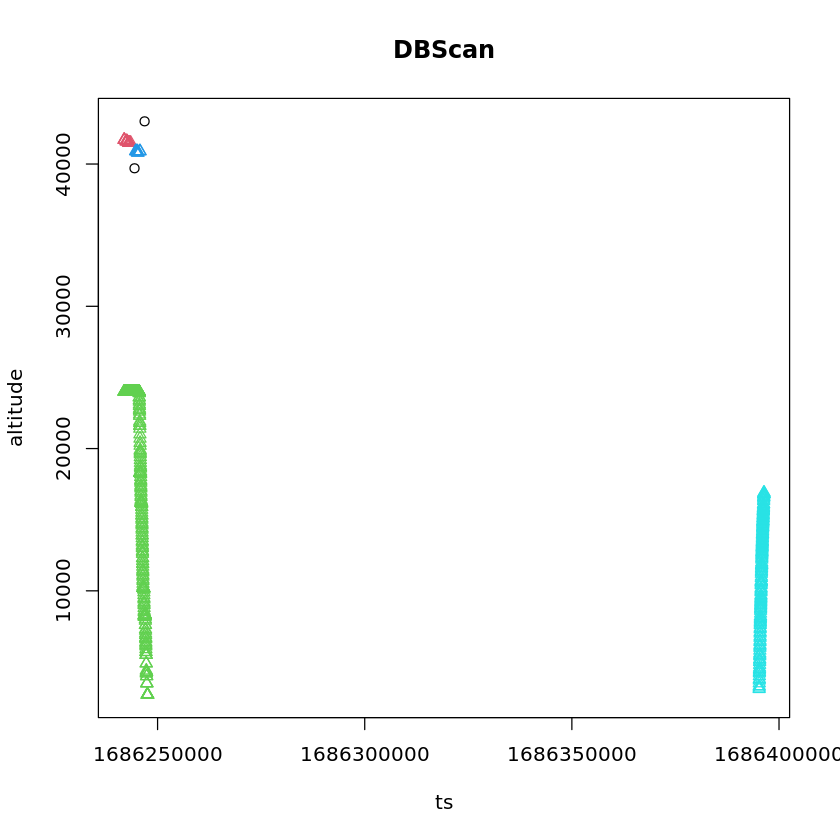

[1] 7


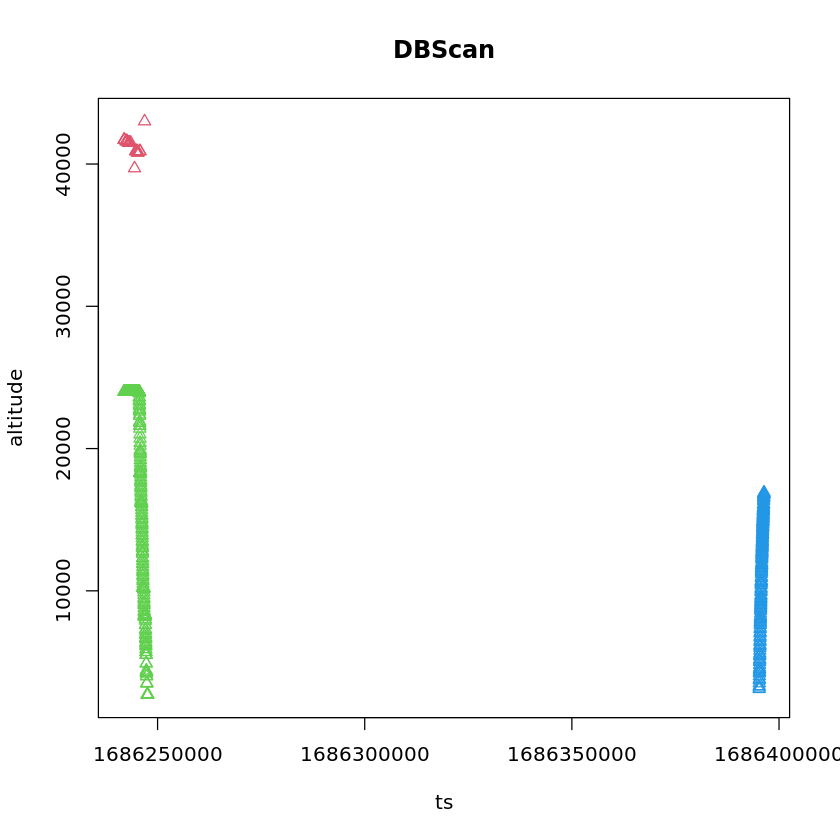

[1] 8
[1] 9
[1] 10


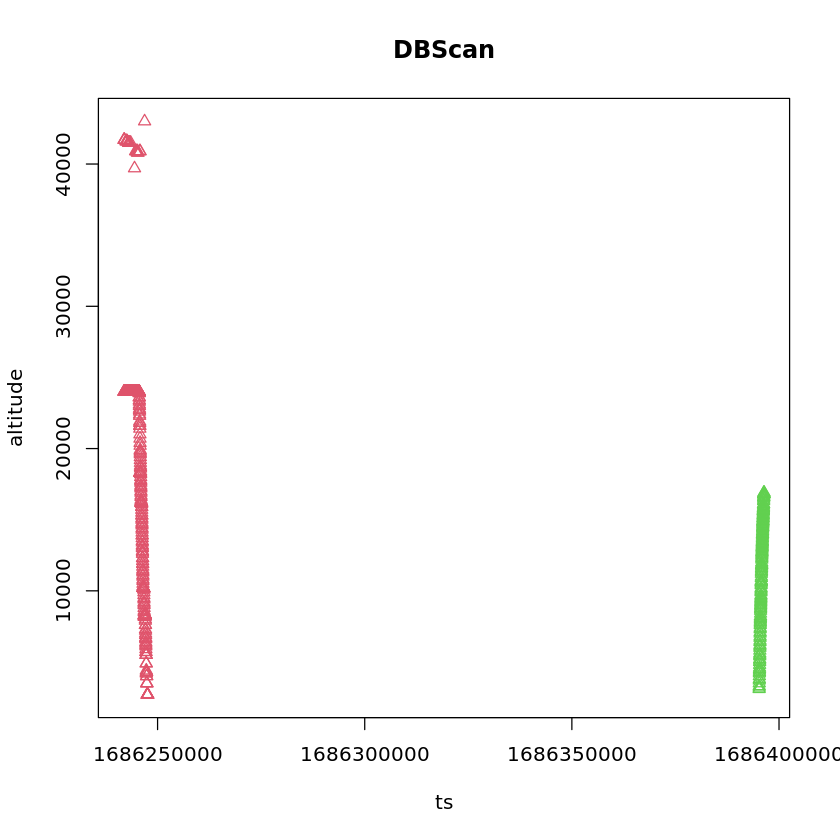

In [19]:
for(i in 1:10) {
    print(i)
    set.seed(220)  # Setting seed
    Dbscan_cl <- dbscan(df1[, c("ts", "altitude")], eps = 10^(i-2))
    if(length(table(Dbscan_cl$cluster)) > 1) {
        plot(Dbscan_cl, df1[, c("ts", "altitude")], main = "DBScan")
        df1$cluster <- Dbscan_cl$cluster
        ggplot(df1[, c("ts", "altitude", "cluster")], aes(x = ts, y = altitude)) +
        geom_point() +
        facet_grid(rows = vars(cluster))
    }
}

In [20]:
set.seed(220)  # Setting seed
Dbscan_cl <- dbscan(df1[, c("ts", "altitude")], eps = 100)
table(Dbscan_cl$cluster)


  0   1   2   3   4   5   6   7 
301 391   5  13  19  19   6   9 

In [21]:
length(table(Dbscan_cl$cluster))

[1] 8

[1] 1
[1] 2
[1] "Hi"


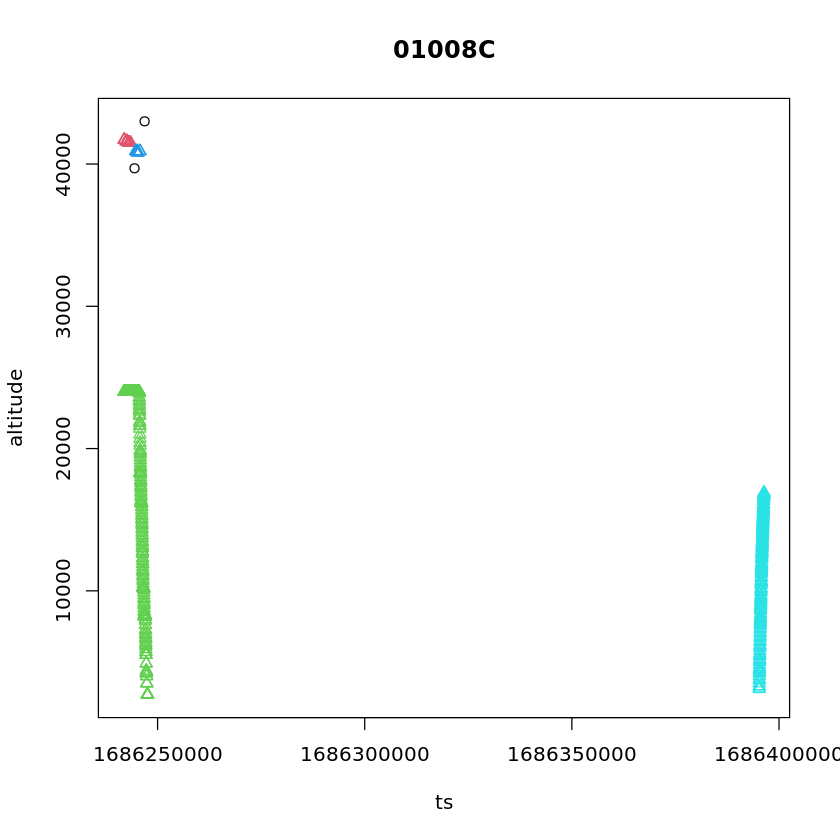

[1] 3
[1] "Hi"


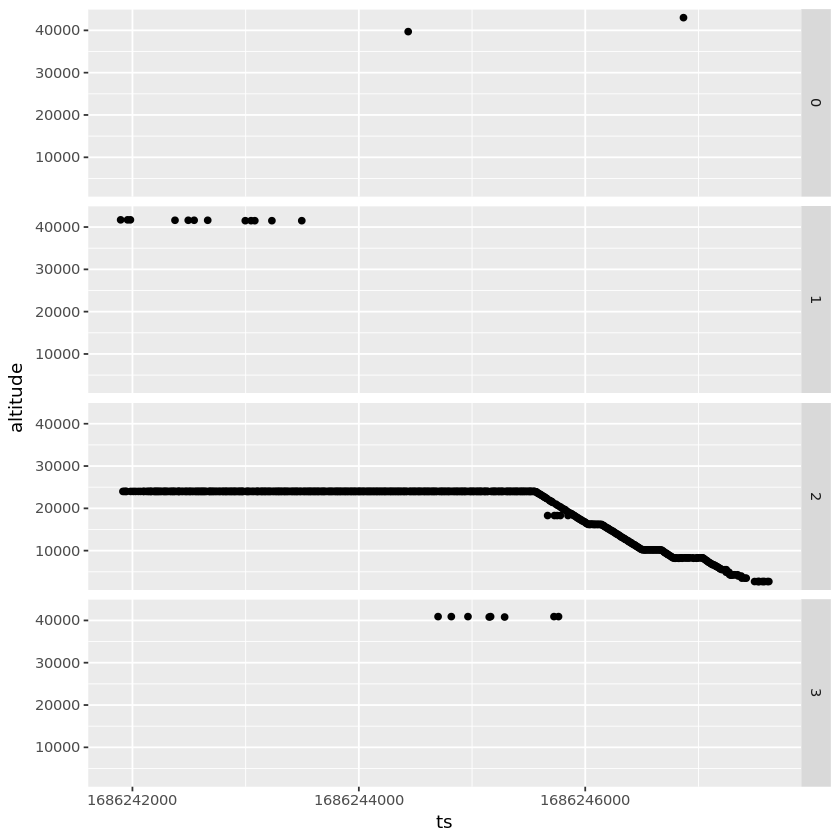

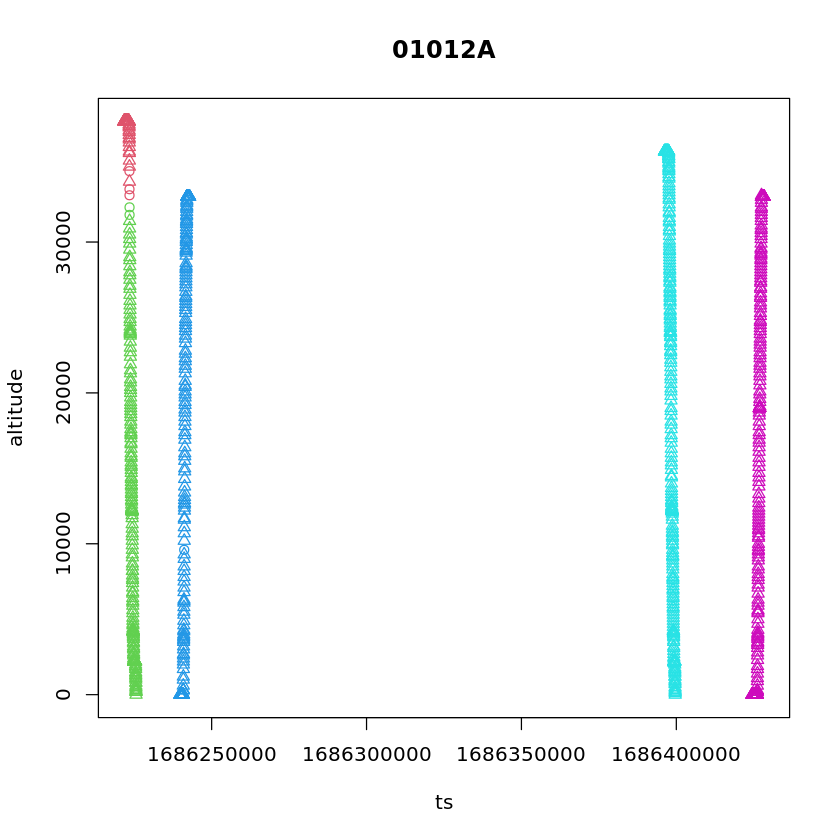

[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] "Hi"


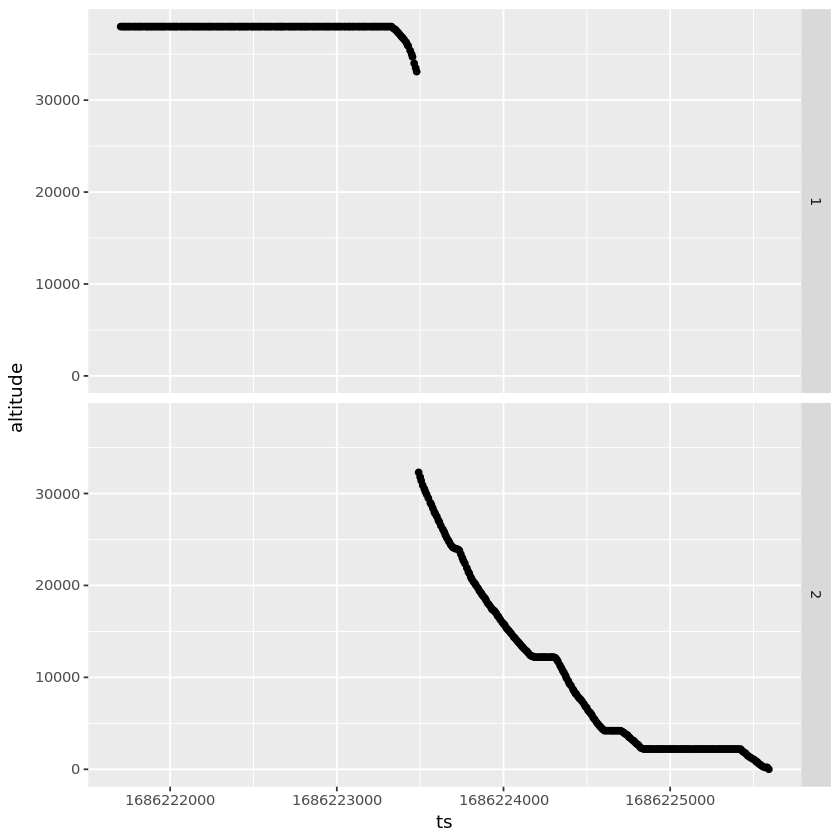

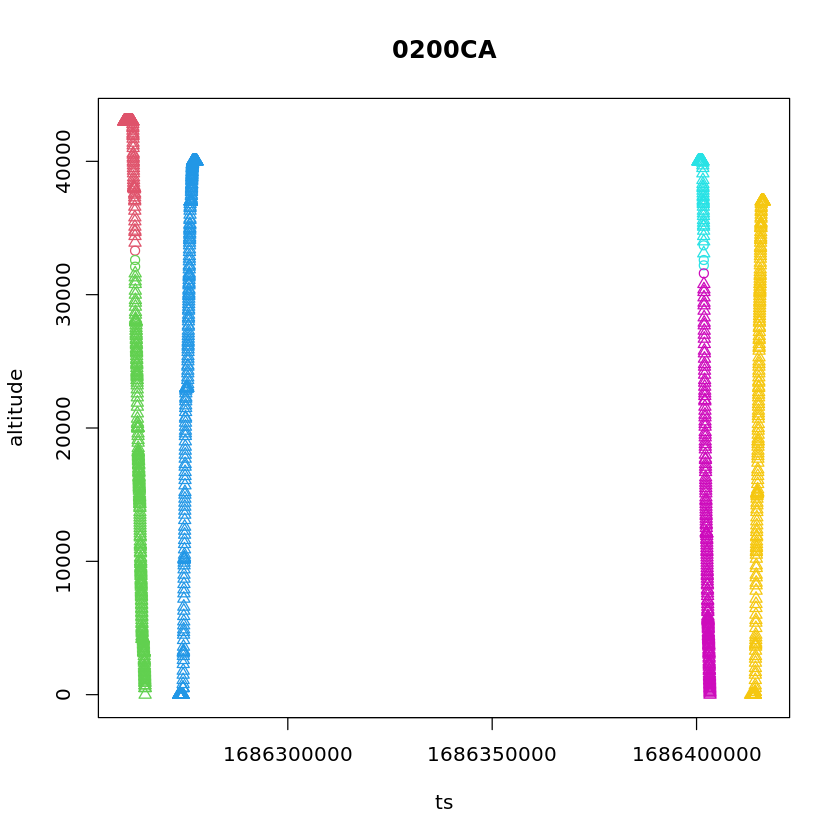

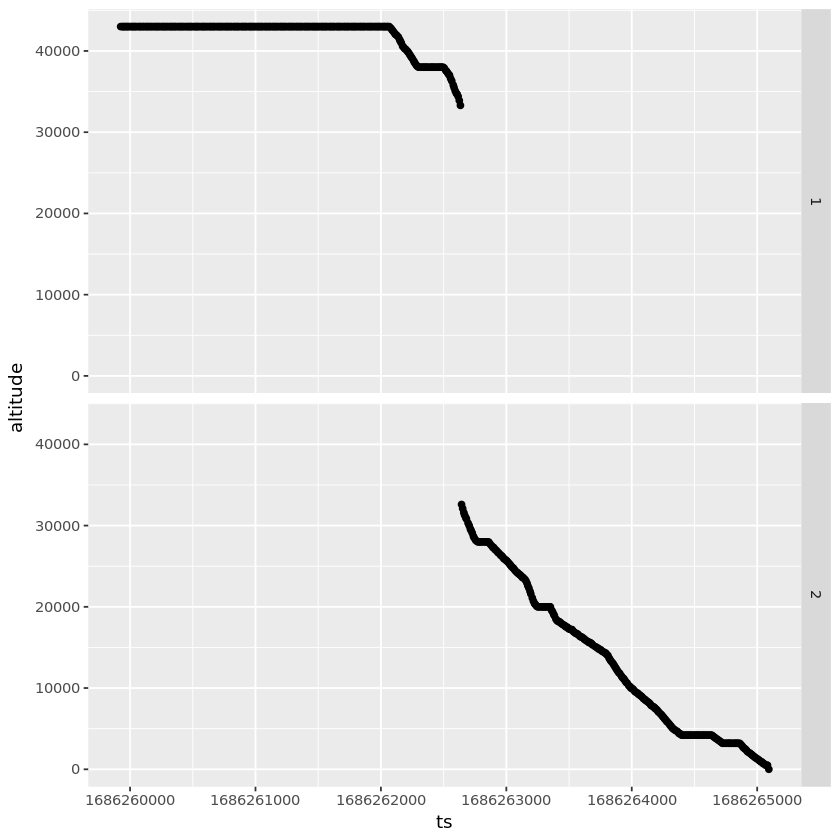

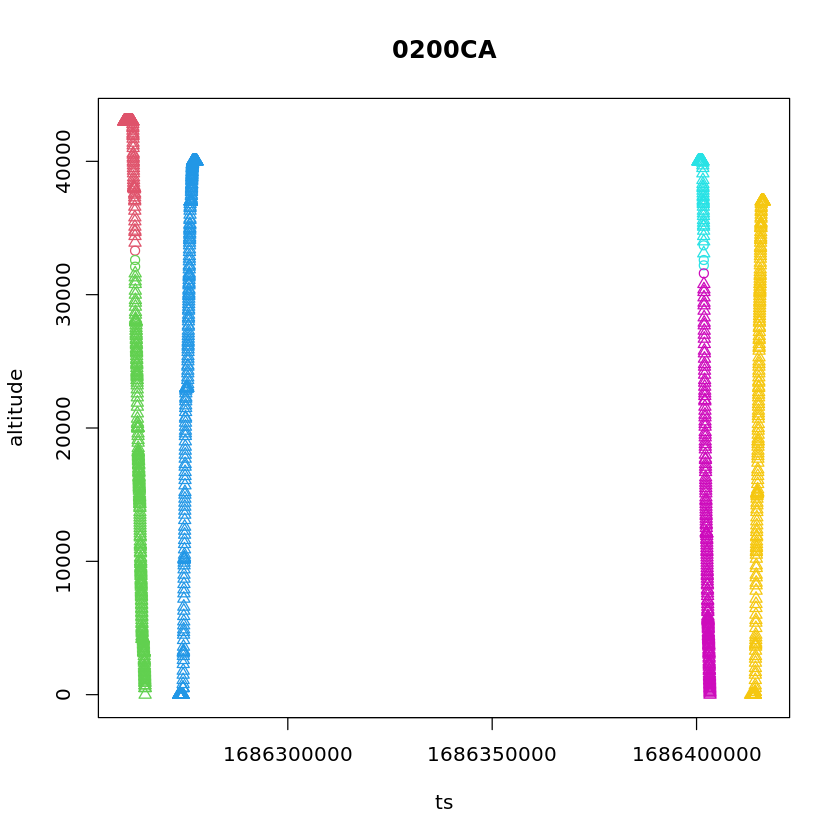

[1] 10


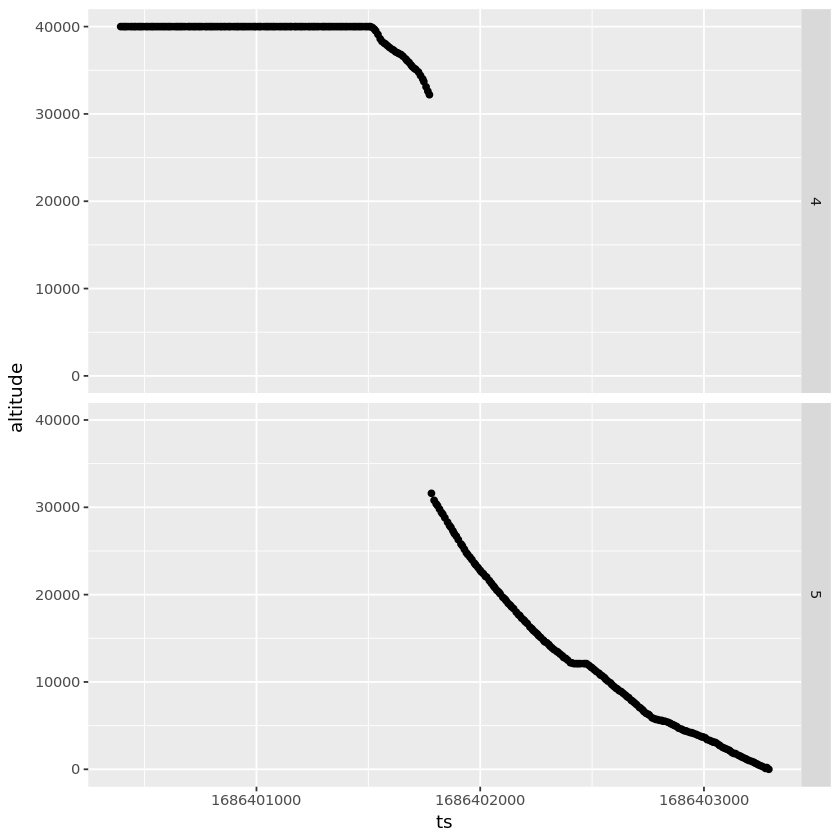

In [22]:
uniq_acs <- unique(ac_data$aircraft)[1:10]
for(i in 1:length(uniq_acs)) {
    set.seed(220)
    print(i)
    ac <- uniq_acs[i]
    df1 <- ac_data[ac_data$aircraft == ac, c("id", "ts", "altitude")]
    Dbscan_cl <- dbscan(df1[, c("ts", "altitude")], eps = 1080)
#     plot(Dbscan_cl, df1[, c("ts", "altitude")], main = ac)
    df1$cluster <- Dbscan_cl$cluster
    ac_summary <- df1 %>% group_by(id) %>% summarize(num_clusters = length(unique(cluster)))
    ambi_ids <- ac_summary$id[ac_summary$num_clusters > 1]
    if(length(ambi_ids) > 0) {
        print("Hi")
        for(id1 in ambi_ids) {
            plot(Dbscan_cl, df1[, c("ts", "altitude")], main = ac)
            df1_ <- df1[df1$id == id1, ]
            print(ggplot(df1_, aes(x = ts, y = altitude)) +
            geom_point() +
            facet_grid(rows = vars(cluster)))
        }
    }
}

In [23]:
i <- 2
ac <- uniq_acs[i]
df1 <- ac_data[ac_data$aircraft == ac, c("id", "ts", "lon", "lat", "altitude")]
Dbscan_cl <- dbscan(df1[, c("ts", "altitude")], eps = 1080)
df1$cluster <- Dbscan_cl$cluster
ac_summary <- df1 %>% group_by(id) %>% summarize(num_clusters = length(unique(cluster)))
ambi_ids <- ac_summary$id[ac_summary$num_clusters > 1]
length(ambi_ids)

[1] 1

In [24]:
ambi_ids

[1] "01008C_0"

In [25]:
ac_summary$id

[1] "01008C_0" "01008C_1"

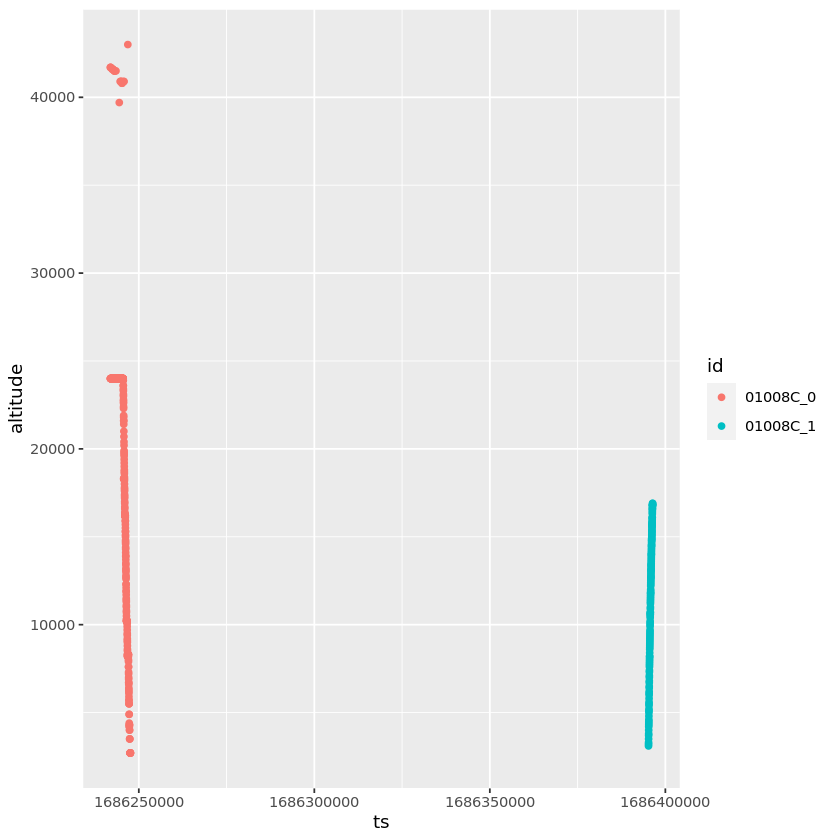

In [26]:
# plot(df1$ts, df1$altitude, col = df1$id)
ggplot(df1) + geom_point(aes(x = ts, y = altitude, col = id))

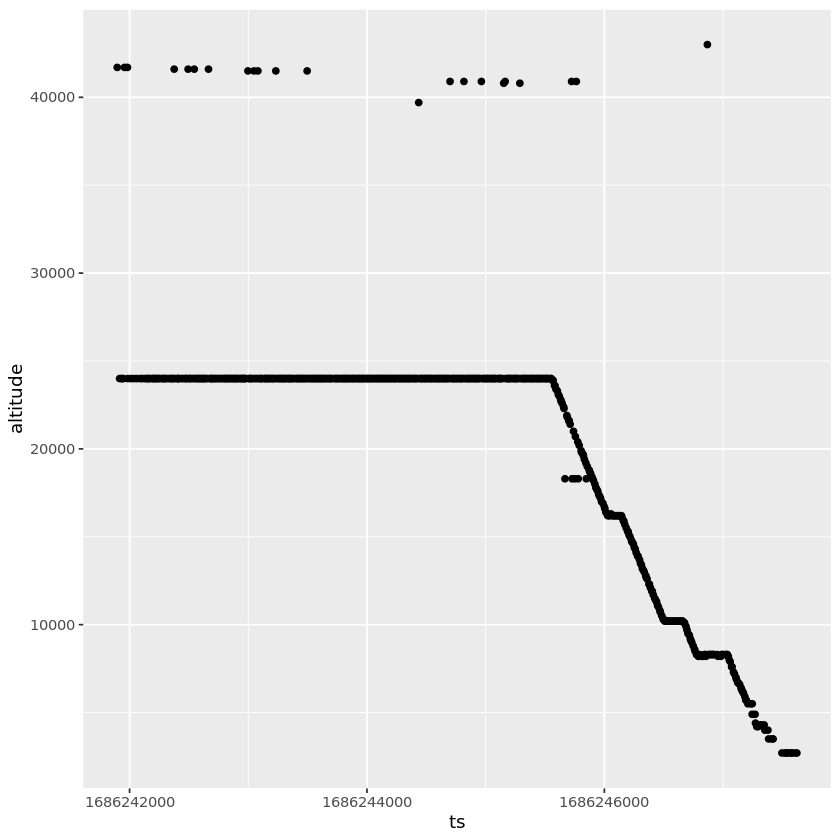

In [27]:
ggplot(df1[df1$id == '01008C_0', ]) + geom_point(aes(x = ts, y = altitude))

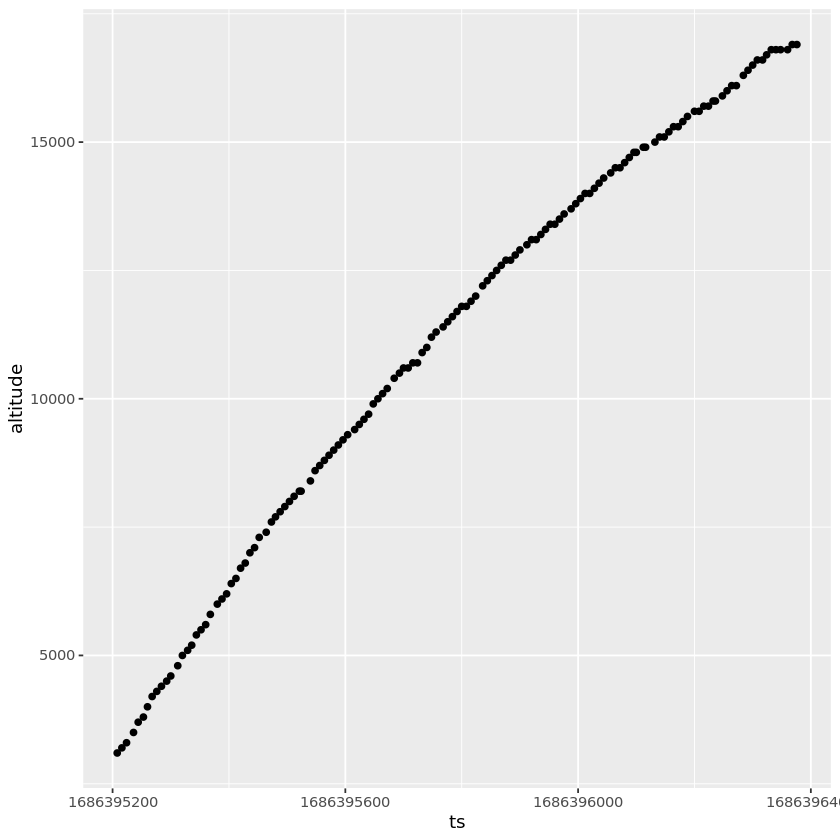

In [28]:
ggplot(df1[df1$id == '01008C_1', ]) + geom_point(aes(x = ts, y = altitude))

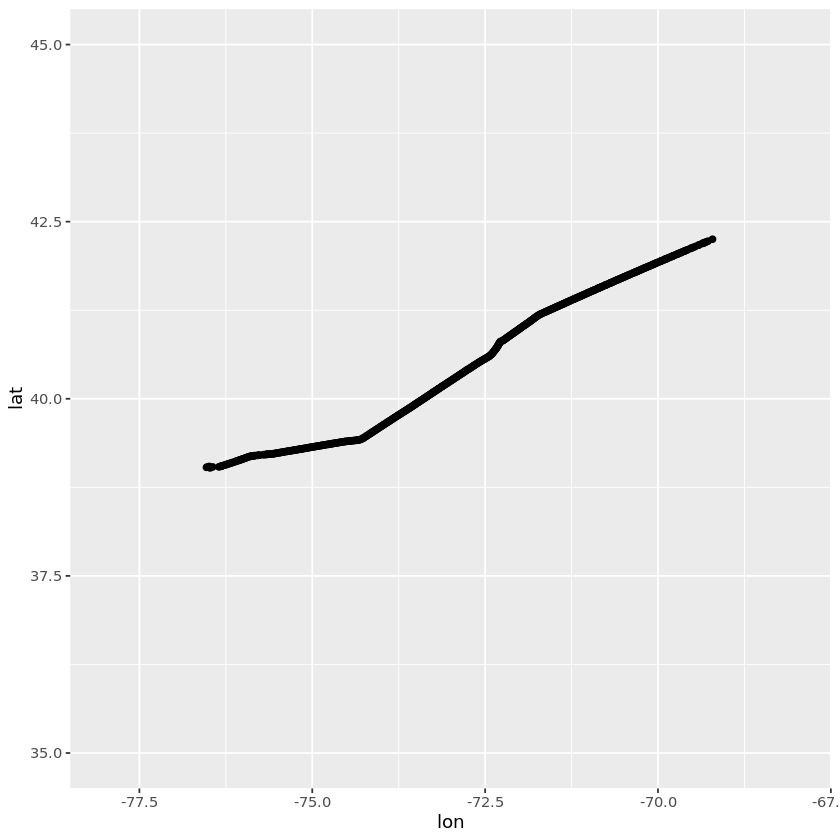

In [29]:
ggplot(df1[df1$id == "01008C_0", ]) + geom_point(aes(x = lon, y = lat)) + xlim(c(-78, -68)) + ylim(c(35, 45))

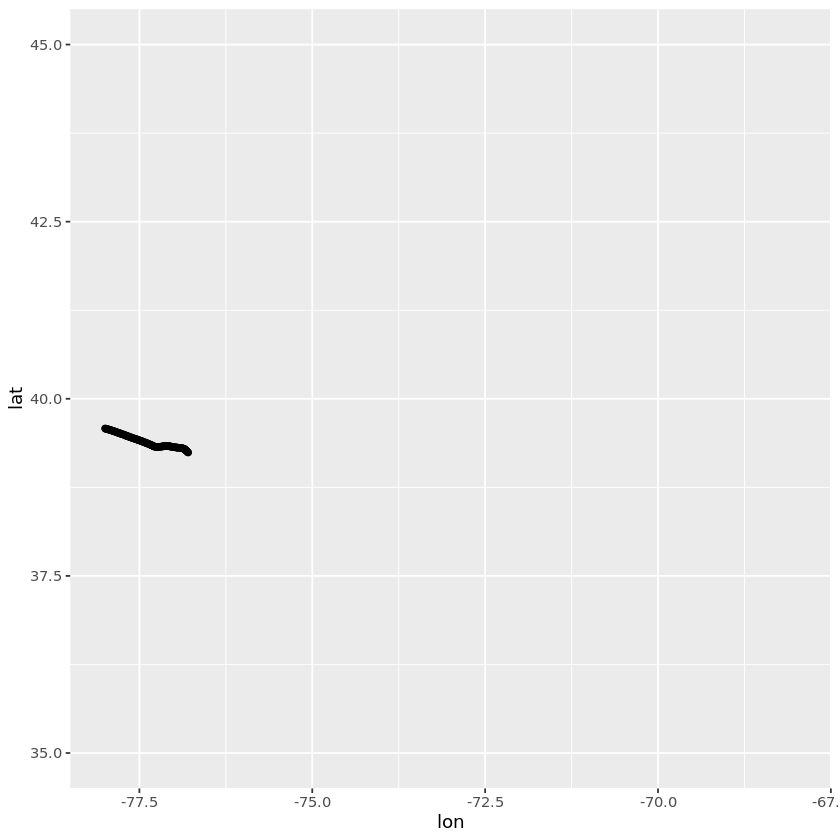

In [30]:
ggplot(df1[df1$id == "01008C_1", ]) + geom_point(aes(x = lon, y = lat)) + xlim(c(-78, -68)) + ylim(c(35, 45))

In [31]:
range1 <- range(df1$ts[df1$id == "01008C_0"])
range1

[1] 1686241896 1686247622

In [32]:
range2 <- range(df1$ts[df1$id == "01008C_1"])
range2

[1] 1686395208 1686396376

In [33]:
overlaping_intervals <- function(range1, range2) {
    return(
        (range1[1] >= range2[1] & range1[1] <= range2[2]) |
        (range1[2] >= range2[1] & range1[2] <= range2[2]) |
        (range2[1] >= range1[1] & range2[1] <= range1[2]) |
        (range2[2] >= range1[1] & range2[2] <= range1[2])
    )
}

overlaping_intervals(range1, range2)

[1] FALSE

In [34]:
df1 %>% group_by(id) %>% summarize(x = paste0(unique(cluster), collapse = " "))

id,x
<chr>,<chr>
01008C_0,1 2 0 3
01008C_1,4


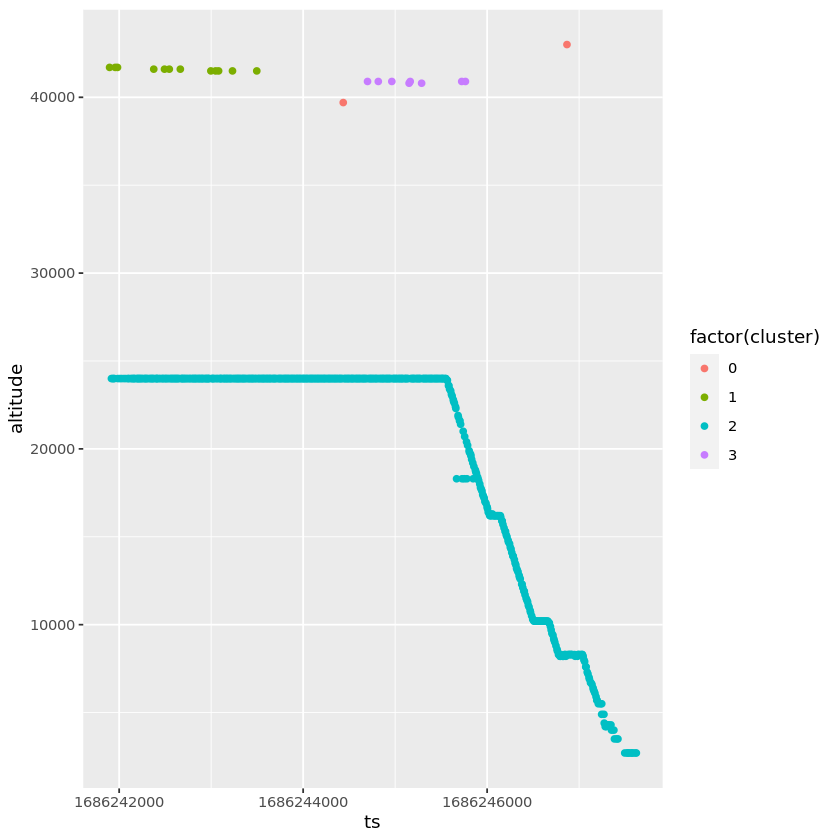

In [35]:
ggplot(df1[df1$id == '01008C_0', ]) + geom_point(aes(x = ts, y = altitude, col = factor(cluster)))

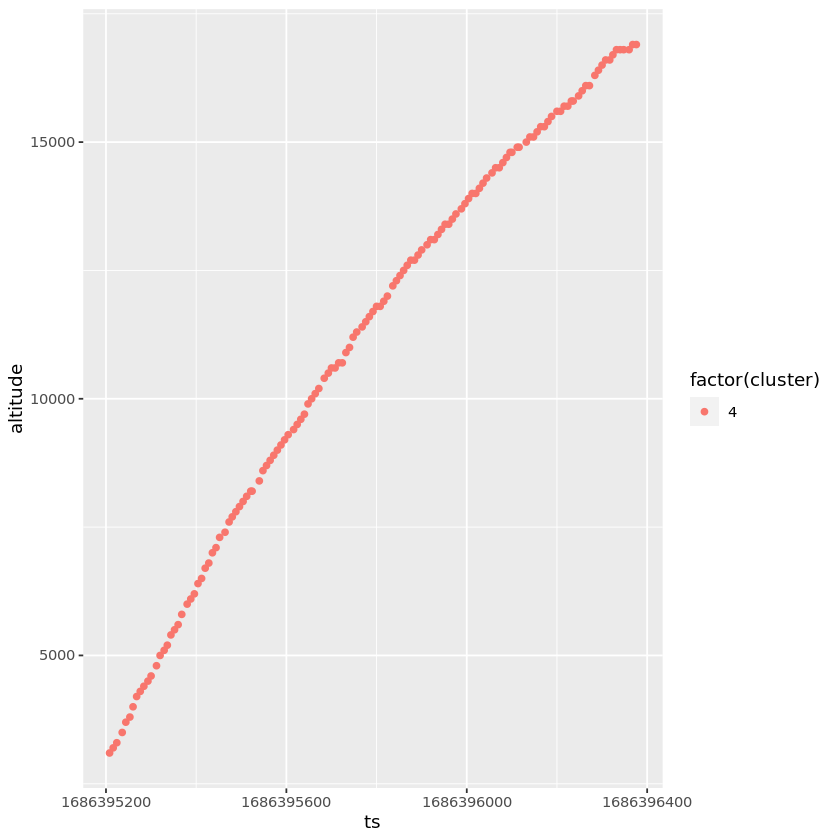

In [36]:
ggplot(df1[df1$id == '01008C_1', ]) + geom_point(aes(x = ts, y = altitude, col = factor(cluster)))

Change in V16_V19 is not sufficient to make a new ID

[1] 3 4
[1] 4 4


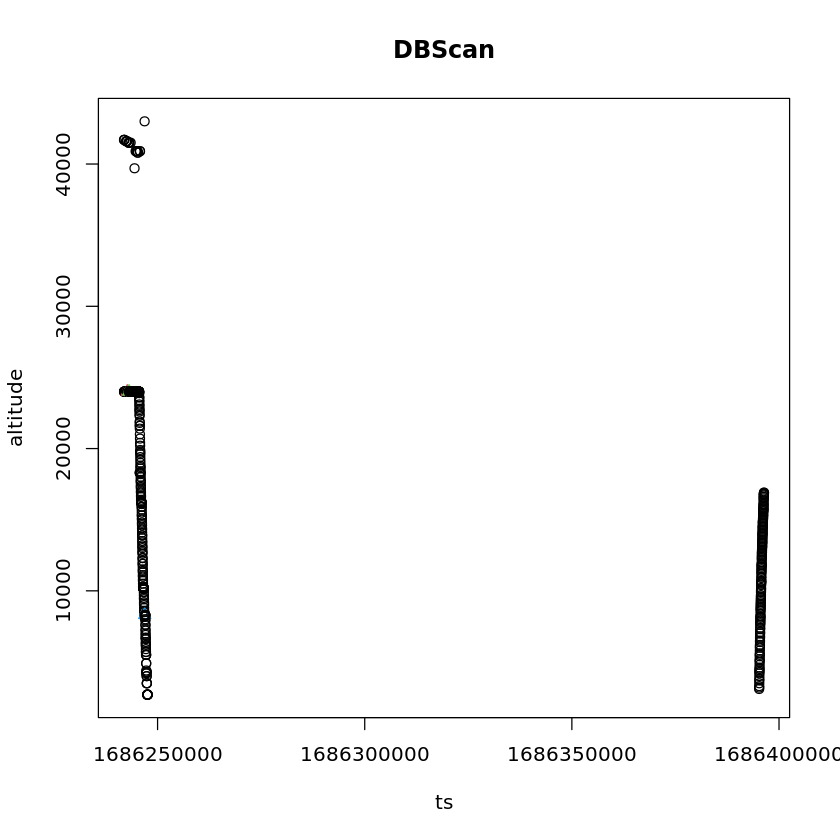

[1] 5 3


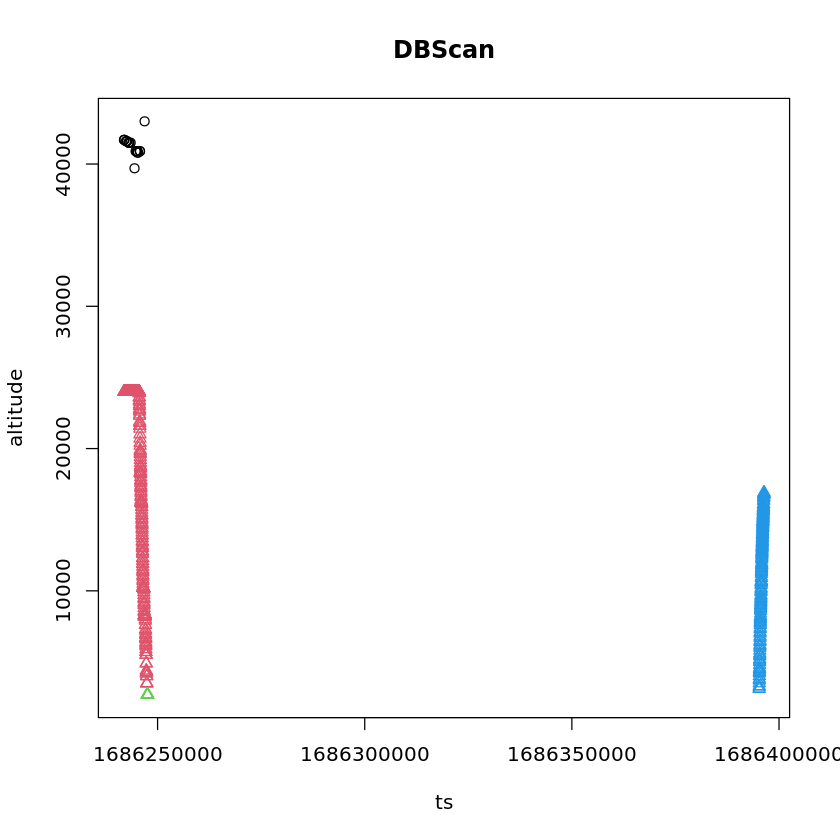

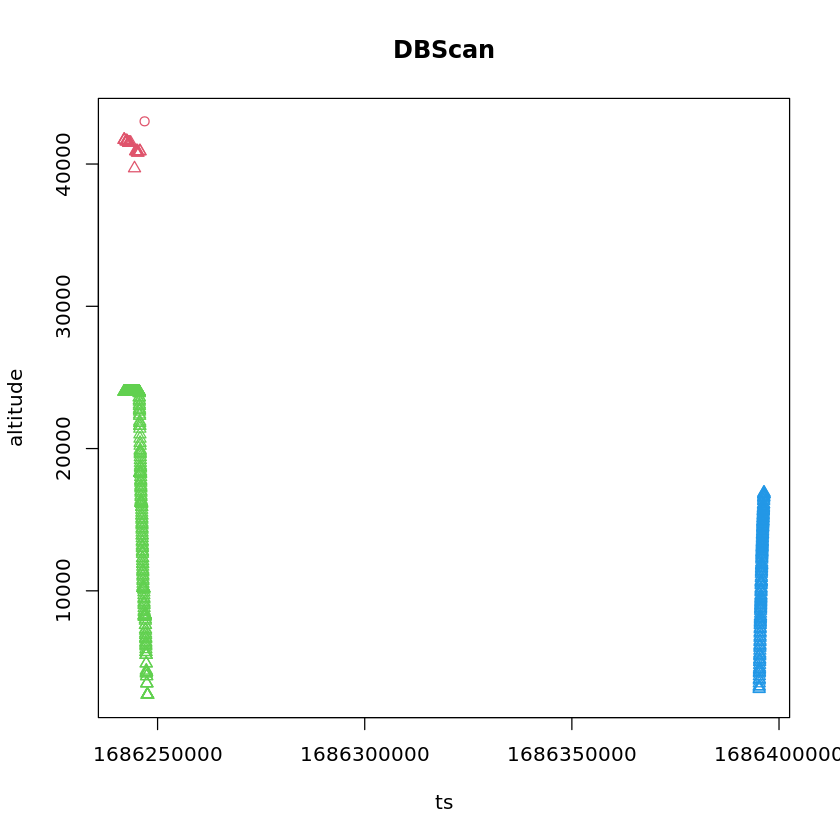

In [37]:
df1$lon_scaled <- scale(df1$lon)
df1$lat_scaled <- scale(df1$lat)
df1$alt_scaled <- scale(df1$altitude)
df1$ts_scaled <- scale(df1$ts)

for(i in 1:10) {
    set.seed(220)  # Setting seed
    Dbscan_cl <- dbscan(df1[, c("ts_scaled", "lon_scaled", "lat_scaled", "alt_scaled")], eps = 10^(i-5))
#     df1$cluster <- Dbscan_cl$cluster
#     ac_summary <- df1 %>% group_by(id) %>% summarize(num_clusters = length(unique(cluster)))
#     ambi_ids <- ac_summary$id[ac_summary$num_clusters > 1]
    if(length(table(Dbscan_cl$cluster)) > 1) {
        print(c(i, length(table(Dbscan_cl$cluster))))
        plot(Dbscan_cl, df1[, c("ts", "altitude")], main = "DBScan")
        df1$cluster <- Dbscan_cl$cluster
        ggplot(df1[, c("ts", "altitude", "cluster")], aes(x = ts, y = altitude)) +
        geom_point() +
        facet_grid(rows = vars(cluster))
    }
}

[1] 10  3


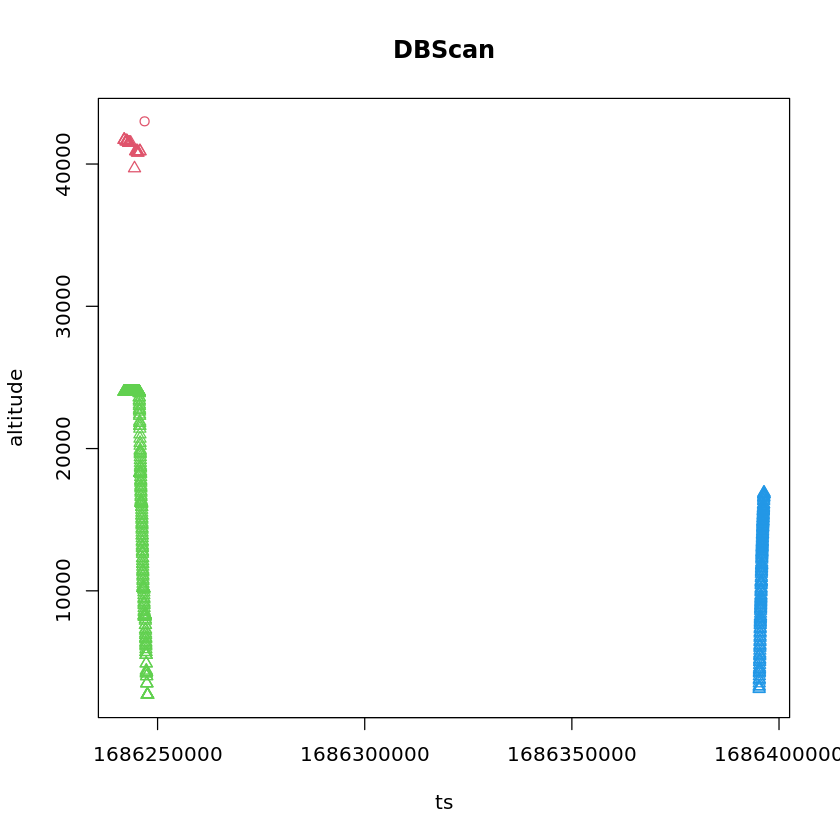

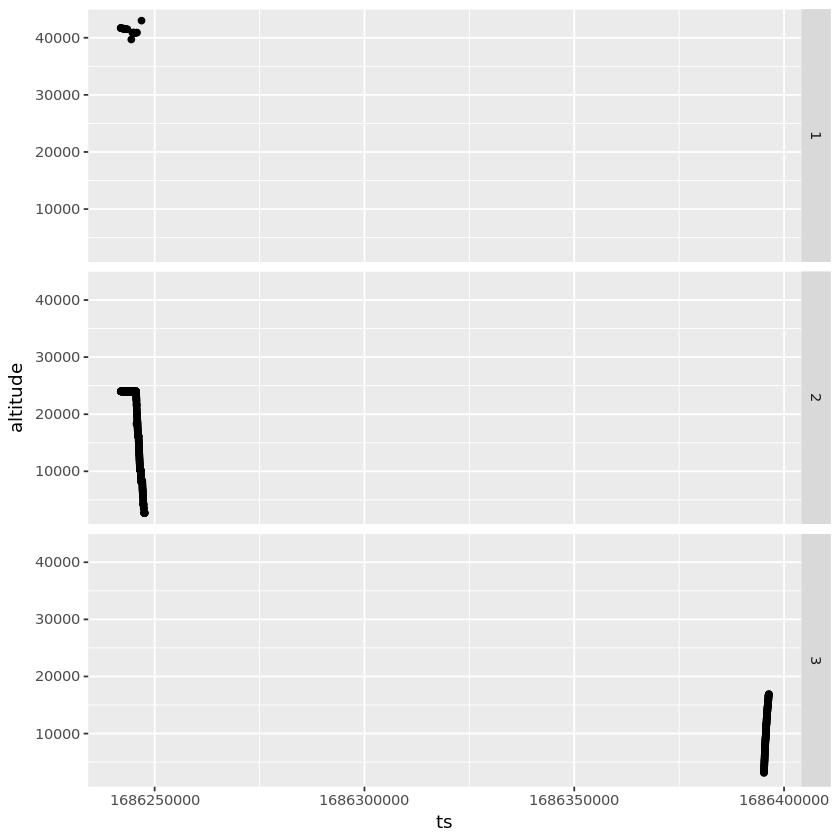

In [38]:
set.seed(220)  # Setting seed
Dbscan_cl <- dbscan(df1[, c("ts_scaled", "lon_scaled", "lat_scaled", "alt_scaled")], eps = 1)
#     df1$cluster <- Dbscan_cl$cluster
#     ac_summary <- df1 %>% group_by(id) %>% summarize(num_clusters = length(unique(cluster)))
#     ambi_ids <- ac_summary$id[ac_summary$num_clusters > 1]
if(length(table(Dbscan_cl$cluster)) > 1) {
    print(c(i, length(table(Dbscan_cl$cluster))))
    plot(Dbscan_cl, df1[, c("ts", "altitude")], main = "DBScan")
    df1$cluster <- Dbscan_cl$cluster
    ggplot(df1[, c("ts", "altitude", "cluster")], aes(x = ts, y = altitude)) +
    geom_point() +
    facet_grid(rows = vars(cluster))
}

# Applying this logic to aircraft with maximum samples

In [39]:
num_samples_df <- ac_data %>% group_by(aircraft) %>% summarize(num_samples = length(id))
setDT(num_samples_df)
setorder(num_samples_df, num_samples)
tail(num_samples_df)

aircraft,num_samples
<chr>,<int>
A7167F,12437
A15B77,12512
AA55EE,12815
A186AD,13562
A2B26B,14127
A3B09A,14244


In [40]:
df1 <- ac_data[ac_data$aircraft == "A3B09A", ]
df1$lon_scaled <- scale(df1$lon)
df1$lat_scaled <- scale(df1$lat)
df1$alt_scaled <- scale(df1$altitude)
df1$ts_scaled <- scale(df1$ts)

set.seed(220)  # Setting seed
Dbscan_cl <- dbscan(df1[, c("ts_scaled", "lon_scaled", "lat_scaled", "alt_scaled")], eps = 1)
if(length(table(Dbscan_cl$cluster)) > 1) {
    print(c(i, length(table(Dbscan_cl$cluster))))
    plot(Dbscan_cl, df1[, c("ts", "altitude")], main = "DBScan")
    df1$cluster <- Dbscan_cl$cluster
    ggplot(df1[, c("ts", "altitude", "cluster")], aes(x = ts, y = altitude)) +
    geom_point() +
    facet_grid(rows = vars(cluster))
}

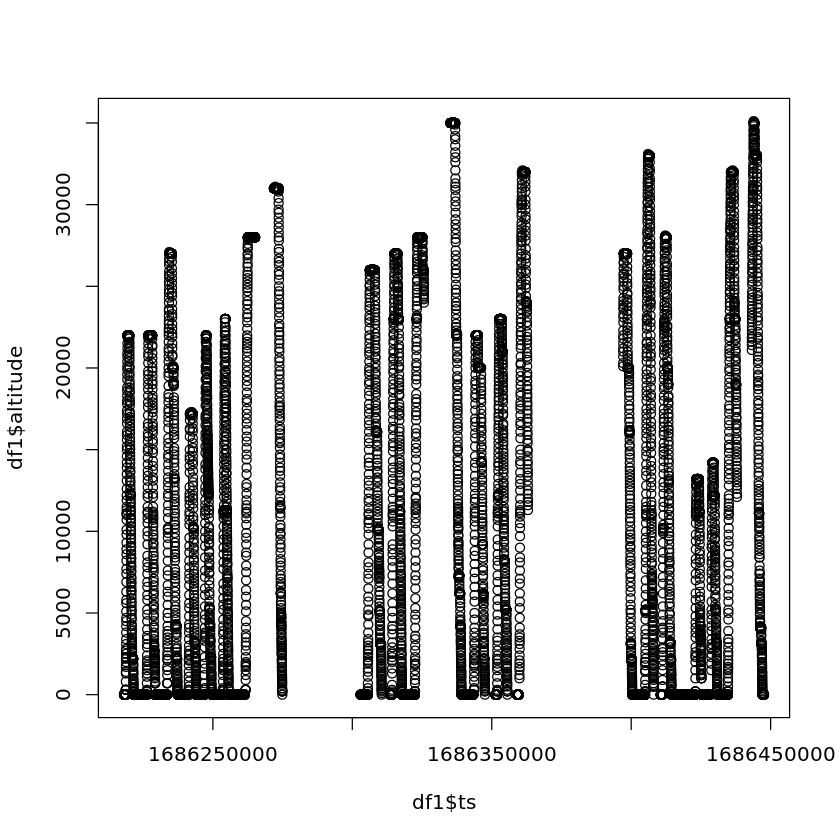

In [41]:
plot(df1$ts, df1$altitude)

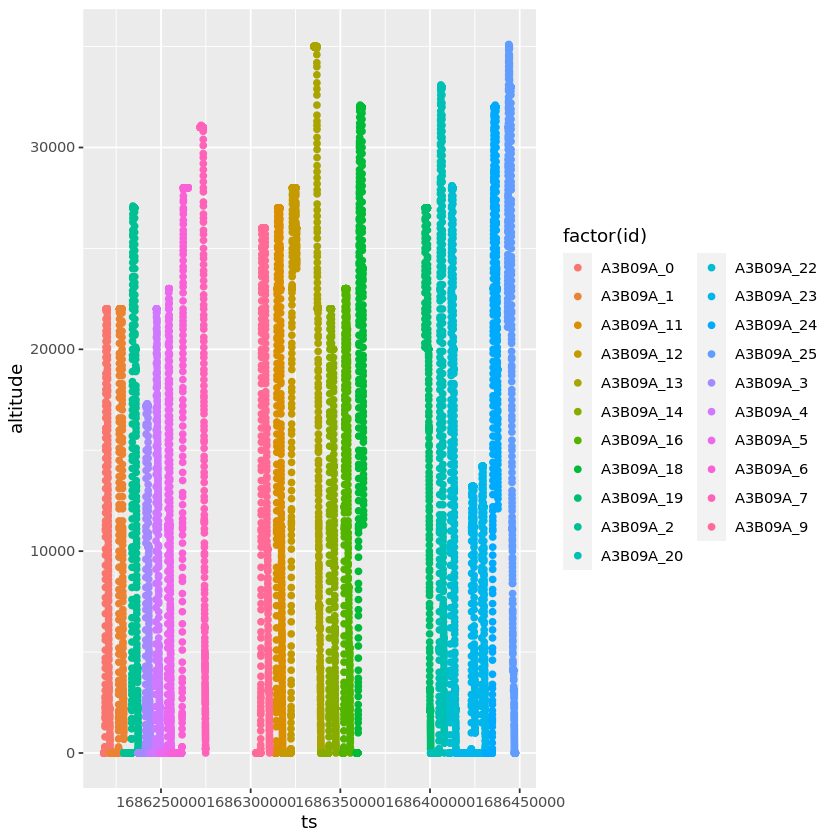

In [42]:
ggplot(df1) + geom_point(aes(x = ts, y = altitude, col = factor(id)))

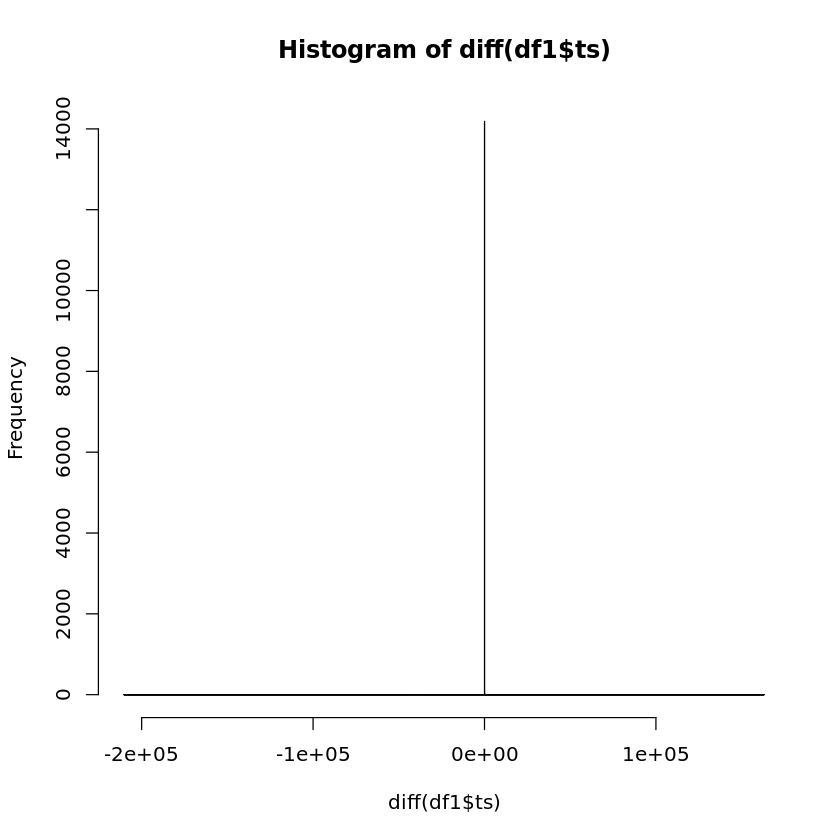

In [43]:
hist(diff(df1$ts), breaks = 10000)

# Clustering each ID of A3B09A by ts_scaled, lat_scaled, lon_scaled, alt_scaled

In [44]:
colnames(df1)

[1] "aircraft"                     "ts"                          
 [3] "V1"                           "V2"                          
 [5] "lat"                          "lon"                         
 [7] "azimuth"                      "altitude"                    
 [9] "ground_speed"                 "V9"                          
[11] "V10"                          "aircraft_type"               
[13] "V12"                          "source"                      
[15] "destination"                  "V16"                         
[17] "ground_flag"                  "climb_rate"                  
[19] "V19"                          "V20"                         
[21] "V21"                          "ts_readable"                 
[23] "quadrant"                     "last_lat"                    
[25] "last_lon"                     "last_azimuth"                
[27] "last_altitude"                "last_ts"                     
[29] "last_source"                  "last_destination"            
[31] "last_V9"                      "last_ground_flag"            
[33] "last_quadrant"                "last_ground_speed"           
[35] "last_V2"                      "next_lat"                    
[37] "next_lon"                     "next_azimuth"                
[39] "next_altitude"                "next_ts"                     
[41] "next_source"                  "next_destination"            
[43] "next_V9"                      "next_ground_flag"            
[45] "next_quadrant"                "next_ground_speed"           
[47] "next_V2"                      "uniq_source"                 
[49] "uniq_destination"             "max_ac_alt"                  
[51] "last_ts_diff"                 "next_ts_diff"                
[53] "est_climb_rate"               "climb_rate_ratio"            
[55] "quadrant_change"              "touchdown_id"                
[57] "max_touchdown"                "max_altitude_touchdown_id"   
[59] "next_touchdown_ts"            "touchdown_time_diff"         
[61] "touchdown"                    "airport"                     
[63] "landed"                       "entered"                     
[65] "expired"                      "landed_or_entered_or_expired"
[67] "num_id"                       "id"                          
[69] "max_alt_ac_id"                "q99_alt_ac_id"               
[71] "max_99_ratio"                 "last_touchdown"              
[73] "next_touchdown"               "last_entered"                
[75] "next_entered"                 "last_airport"                
[77] "next_airport"                 "ts_scaled"                   
[79] "lon_scaled"                   "lat_scaled"                  
[81] "alt_scaled"                   "id_cluster"                  
[83] "max_ac_altitude"              "num_uniq_alt_id"             
[85] "num_uniq_cluster"             "most_frequent_altitude_1"    
[87] "most_frequent_altitude_2"     "num_ac_samples"              
[89] "num_ids"                      "num_alts"                    
[91] "num_id_clusters"

In [45]:
cluster_id <- function(ts_scaled, lon_scaled, lat_scaled, alt_scaled) {
    tryCatch({
        set.seed(220)  # Setting seed
        df1 <- data.frame("ts_scaled" = ts_scaled, "lon_scaled" = lon_scaled, "lat_scaled" = lat_scaled, "alt_scaled" = alt_scaled)
        Dbscan_cl <- dbscan(df1, eps = 1)
    #     if(length(table(Dbscan_cl$cluster)) > 1) {
    #         print(c(i, length(table(Dbscan_cl$cluster))))
    #         plot(Dbscan_cl, df1[, c("ts", "altitude")], main = "DBScan")
    #         df1$cluster <- Dbscan_cl$cluster
    #         ggplot(df1[, c("ts", "altitude", "cluster")], aes(x = ts, y = altitude)) +
    #         geom_point() +
    #         facet_grid(rows = vars(cluster))
    #     }
        return(Dbscan_cl$cluster)
    }, error = function(e) {
        return(rep(1, length(ts_scaled)))
    })
}

In [46]:
setDT(df1)
# df1[, c("id_cluster") := list(cluster_id(ts_scaled, lon_scaled, lat_scaled, alt_scaled)), by = "id"]

Warning message in setDT(df1):
“Some columns are a multi-column type (such as a matrix column): [78, 79, 80, 81]. setDT will retain these columns as-is but subsequent operations like grouping and joining may fail. Please consider as.data.table() instead which will create a new column for each embedded column.”


In [47]:
source("preprocess_utils.R")
df1 %>% group_by(id) %>% summarize(most_frequent_cluster = most_frequent(id_cluster))
df1 %>% group_by(id) %>% summarize(most_frequent_cluster_percent = most_frequent_percent(id_cluster))

id,most_frequent_cluster
<chr>,<chr>
A3B09A_0,1
A3B09A_1,1
A3B09A_11,1
A3B09A_12,1
A3B09A_13,1
A3B09A_14,1
A3B09A_16,1
A3B09A_18,1
A3B09A_19,1


id,most_frequent_cluster_percent
<chr>,<dbl>
A3B09A_0,1
A3B09A_1,1
A3B09A_11,1
A3B09A_12,1
A3B09A_13,1
A3B09A_14,1
A3B09A_16,1
A3B09A_18,1
A3B09A_19,1


In [48]:
i <- 2
ac <- uniq_acs[i]
df1 <- ac_data[ac_data$aircraft == ac, c("id", "ts", "lon", "lat", "altitude")]
df1[, c("ts_scaled", "lon_scaled", "lat_scaled", "alt_scaled")] <- scale(df1[, c("ts", "lon", "lat", "altitude")])
setDT(df1)

In [49]:
df1[, c("id_cluster") := list(cluster_id(ts_scaled, lon_scaled, lat_scaled, alt_scaled)), by = "id"]
df1 %>% group_by(id) %>% summarize(most_frequent_cluster = most_frequent(id_cluster))
df1 %>% group_by(id) %>% summarize(most_frequent_cluster_percent = most_frequent_percent(id_cluster))

id,most_frequent_cluster
<chr>,<chr>
01008C_0,2
01008C_1,1


id,most_frequent_cluster_percent
<chr>,<dbl>
01008C_0,0.9647436
01008C_1,1.0000000


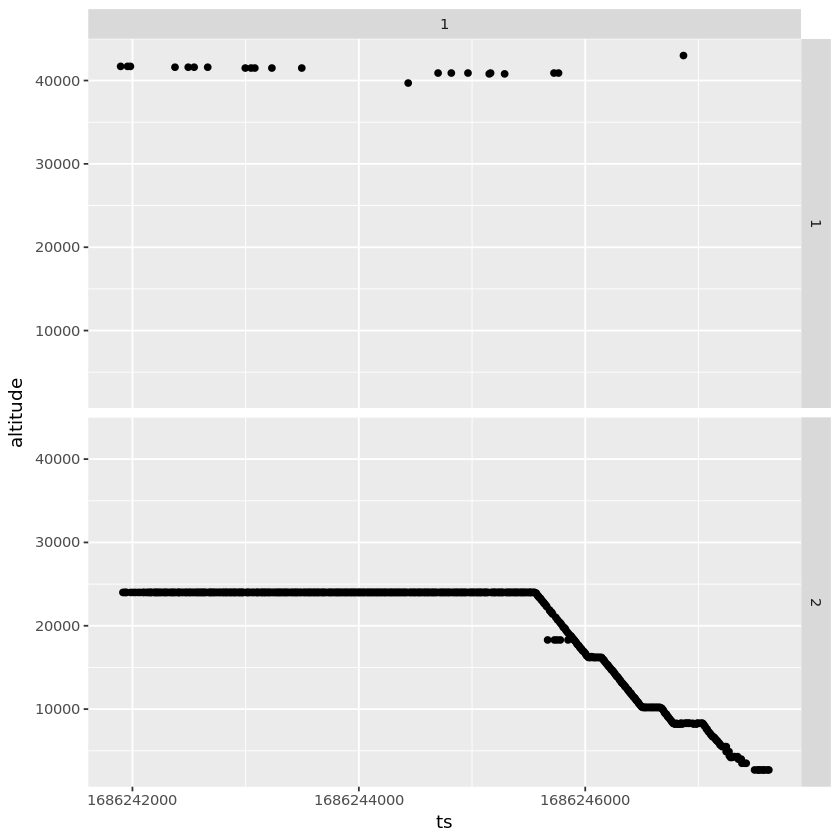

In [50]:
condition <- df1$id == "01008C_0"
ggplot(df1[condition, ]) + geom_point(aes(x = ts, y = altitude)) + facet_grid(id_cluster ~ 1)

In [51]:
scale_ <- function(x) {
    mn_x <- mean(x)
    sd_x <- sd(x)
    return((x-mn_x)/sd_x)
}

setDT(ac_data)
setorder(ac_data, aircraft, id, ts)
ac_data[, c("ts_scaled", "lon_scaled", "lat_scaled", "alt_scaled") :=
        list(scale_(ts), scale_(lon), scale_(lat), scale_(altitude)), by = "id"]
# ac_data[, c("id_cluster") := list(cluster_id(ts_scaled, lon_scaled, lat_scaled, alt_scaled)), by = "id"]

In [52]:
cluster_id_df <- ac_data %>% group_by(id) %>% summarize(most_frequent_cluster = most_frequent(id_cluster))
percent_df <- ac_data %>% group_by(id) %>% summarize(most_frequent_cluster_percent = most_frequent_percent(id_cluster))

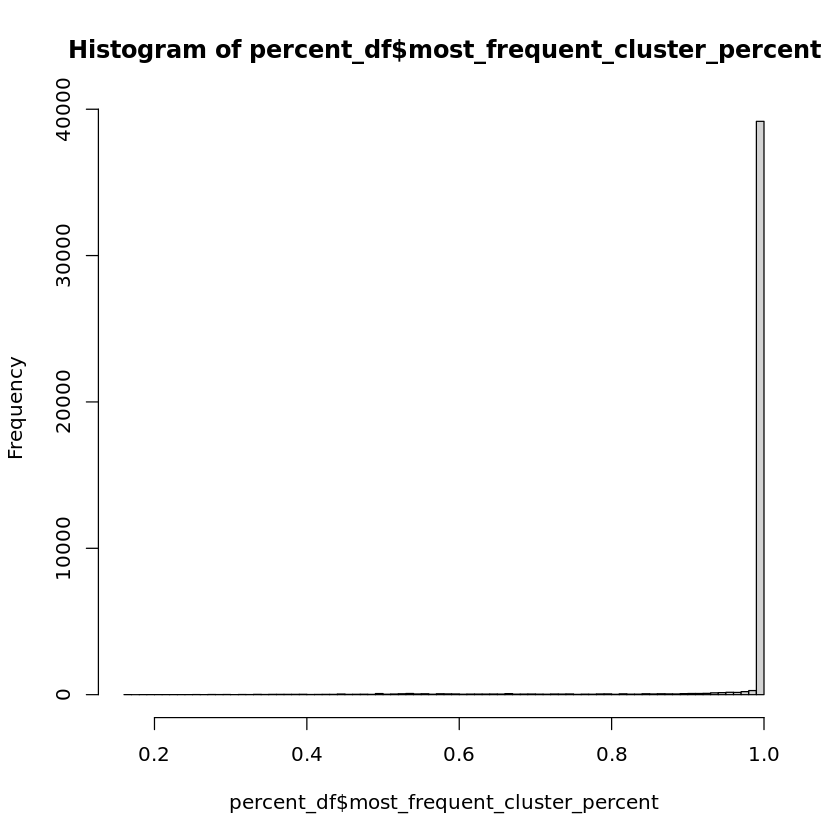

In [53]:
hist(percent_df$most_frequent_cluster_percent, breaks = 100)

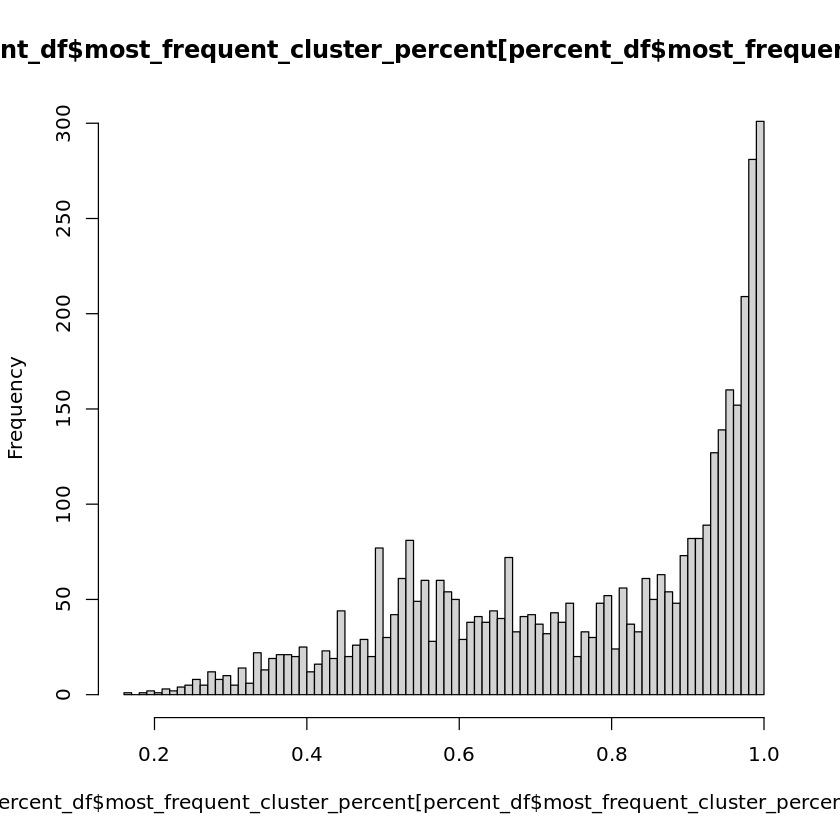

In [54]:
hist(percent_df$most_frequent_cluster_percent[percent_df$most_frequent_cluster_percent < 1], breaks = 100)

In [55]:
percent_df$id[percent_df$most_frequent_cluster_percent == min(percent_df$most_frequent_cluster_percent)]

[1] "A66F4E_1"

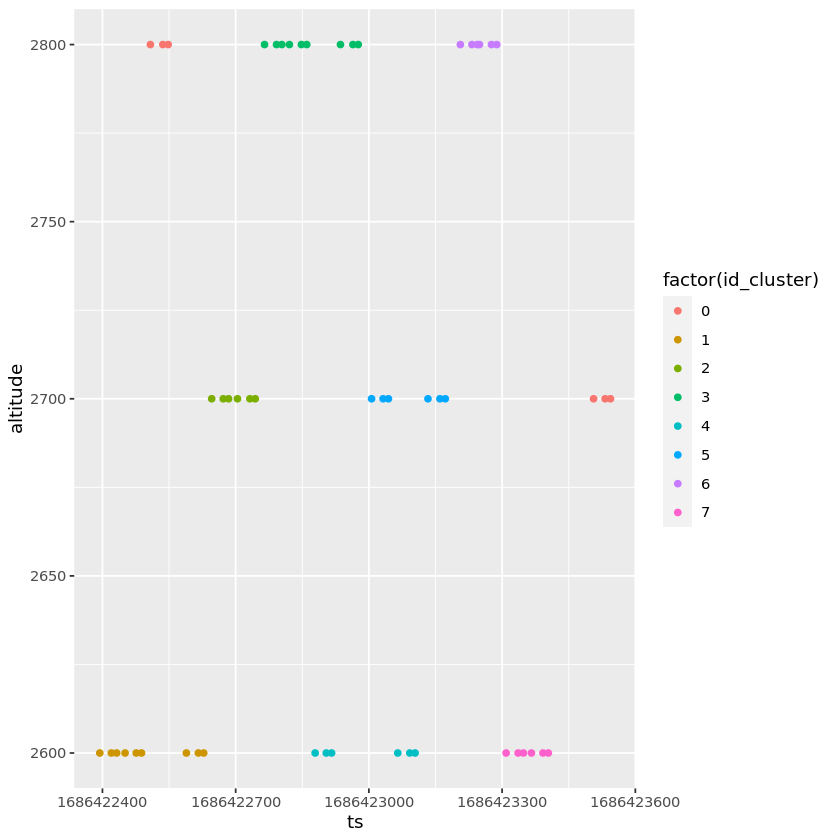

In [56]:
id1 <- 'A66F4E_1'
df1 <- ac_data[ac_data$id == id1, ]
ggplot(df1) + geom_point(aes(x = ts, y = altitude, col = factor(id_cluster)))

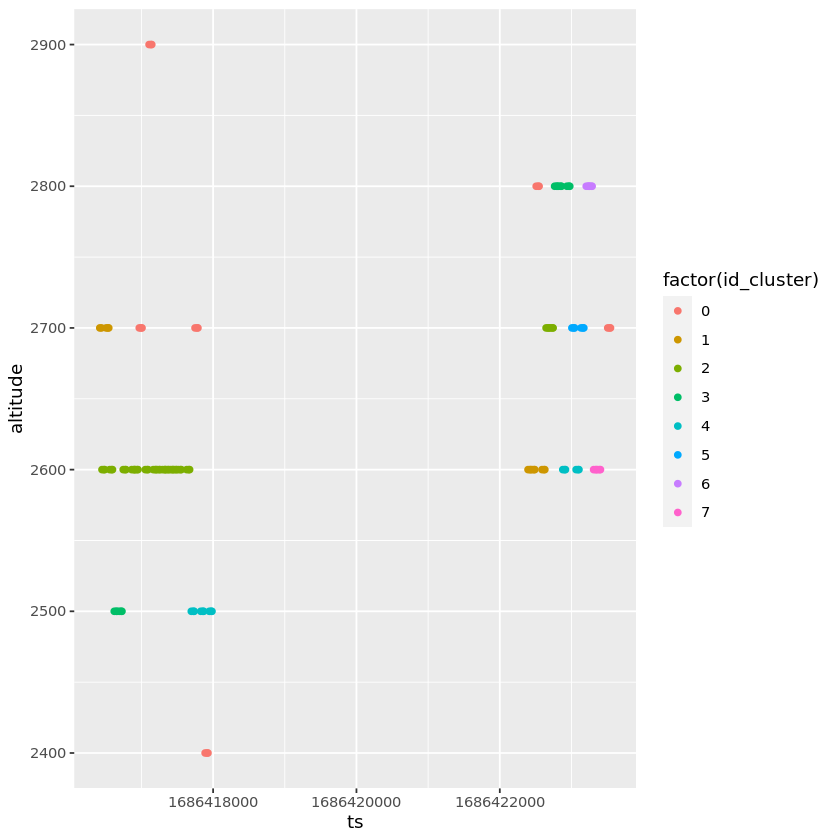

In [57]:
df1 <- ac_data[ac_data$aircraft == "A66F4E", ]
ggplot(df1) + geom_point(aes(x = ts, y = altitude, col = factor(id_cluster)))

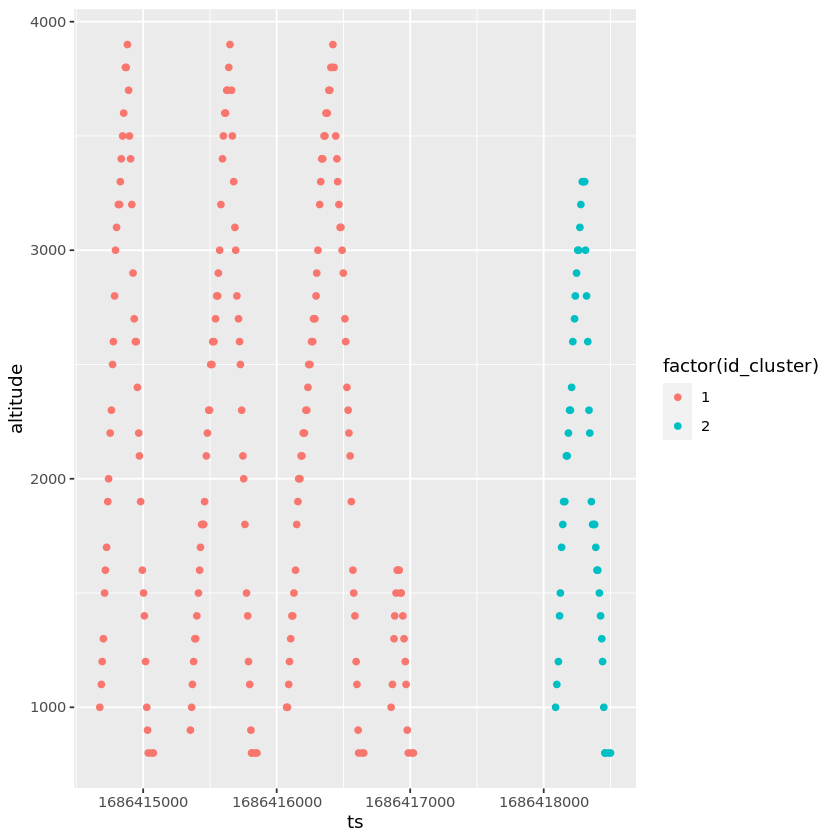

In [58]:
percent_df <- percent_df[order(percent_df$most_frequent_cluster_percent, decreasing = F), ]
id1 <- percent_df$id[percent_df$most_frequent_cluster_percent > 0.8][1]
df1 <- ac_data[ac_data$id == id1, ]
ggplot(df1) + geom_point(aes(x = ts, y = altitude, col = factor(id_cluster)))

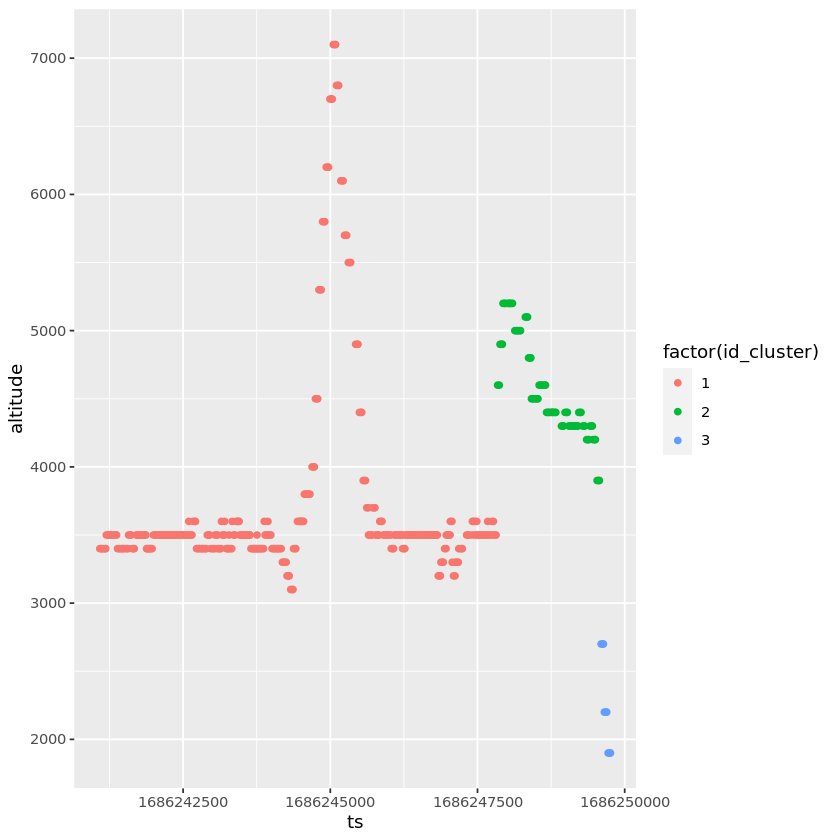

In [59]:
id1 <- percent_df$id[percent_df$most_frequent_cluster_percent > 0.8][2]
df1 <- ac_data[ac_data$id == id1, ]
ggplot(df1) + geom_point(aes(x = ts, y = altitude, col = factor(id_cluster)))

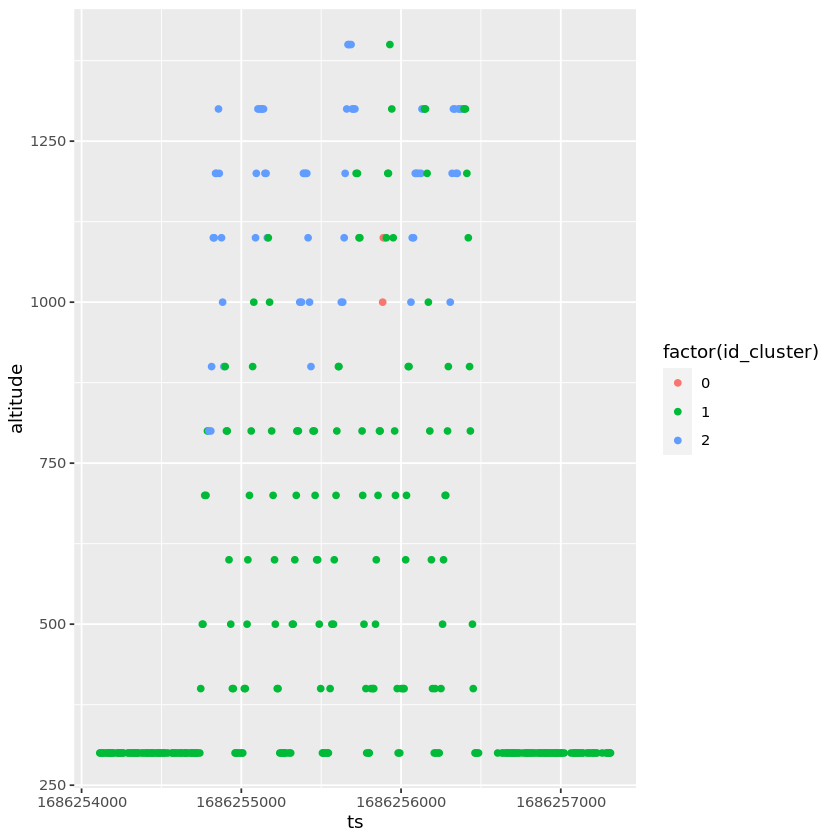

In [60]:
id1 <- percent_df$id[percent_df$most_frequent_cluster_percent > 0.8][3]
df1 <- ac_data[ac_data$id == id1, ]
ggplot(df1) + geom_point(aes(x = ts, y = altitude, col = factor(id_cluster)))

In [61]:
ac_alt_data <- unique(ac_data[, c("aircraft", "max_ac_alt")])

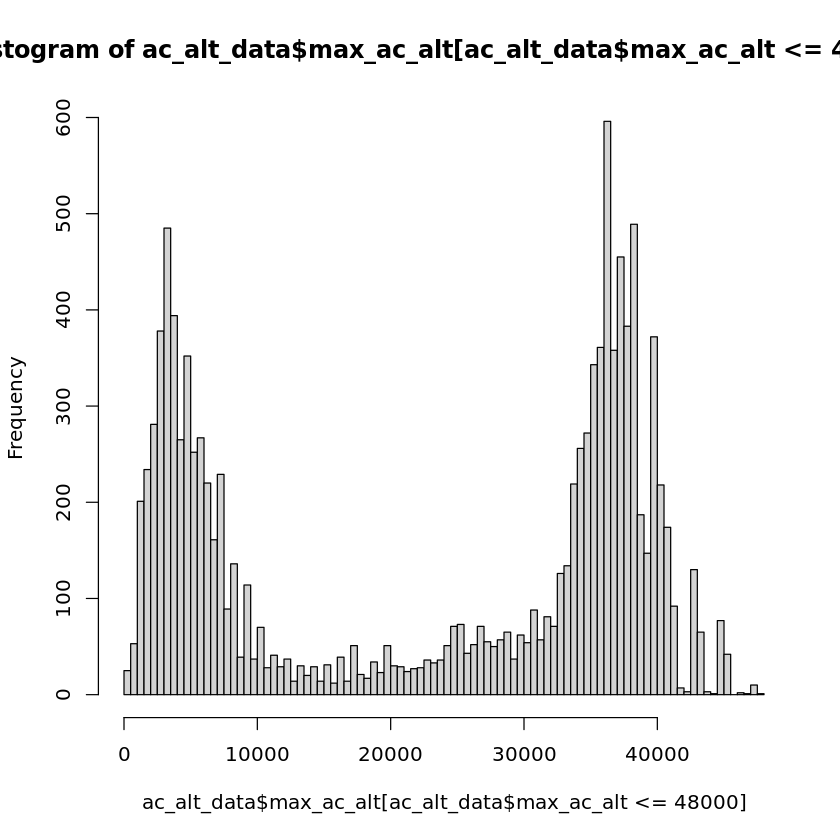

In [62]:
hist(ac_alt_data$max_ac_alt[ac_alt_data$max_ac_alt <= 48000], breaks= 100)

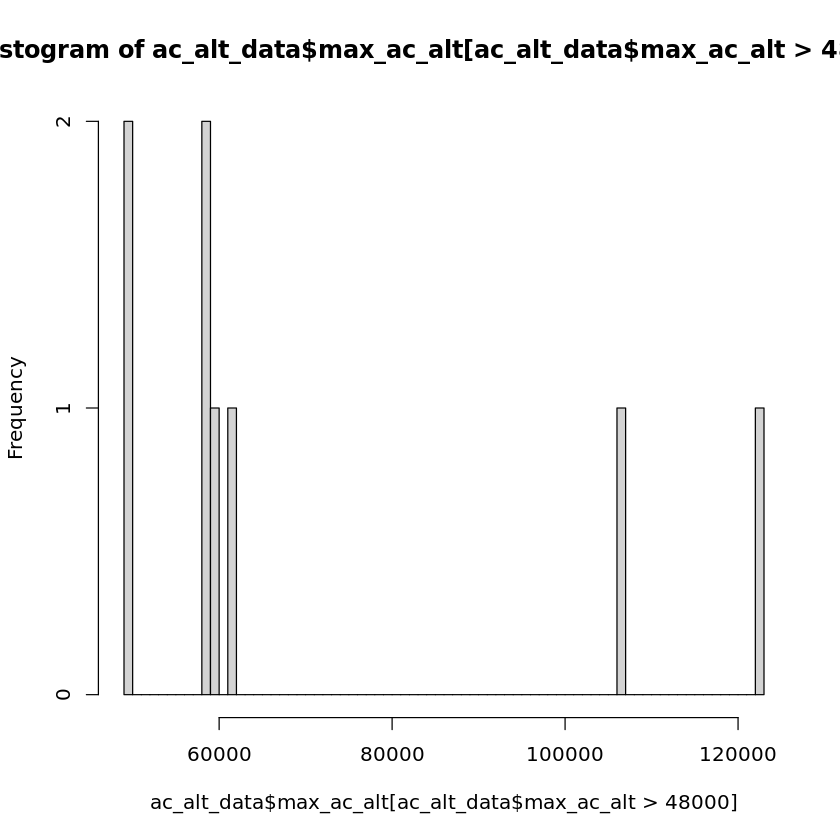

In [63]:
hist(ac_alt_data$max_ac_alt[ac_alt_data$max_ac_alt > 48000], breaks= 100)

In [64]:
ac_alt_data[ac_alt_data$max_ac_alt > 48000, c("aircraft", "max_ac_alt")]

aircraft,max_ac_alt
<chr>,<int>
A1A06F,49100
A4ED6C,61300
A51358,59700
A6EEB9,58400
A9F87D,106300
AB3C15,123000
ACC317,49000
AD2A5C,58100


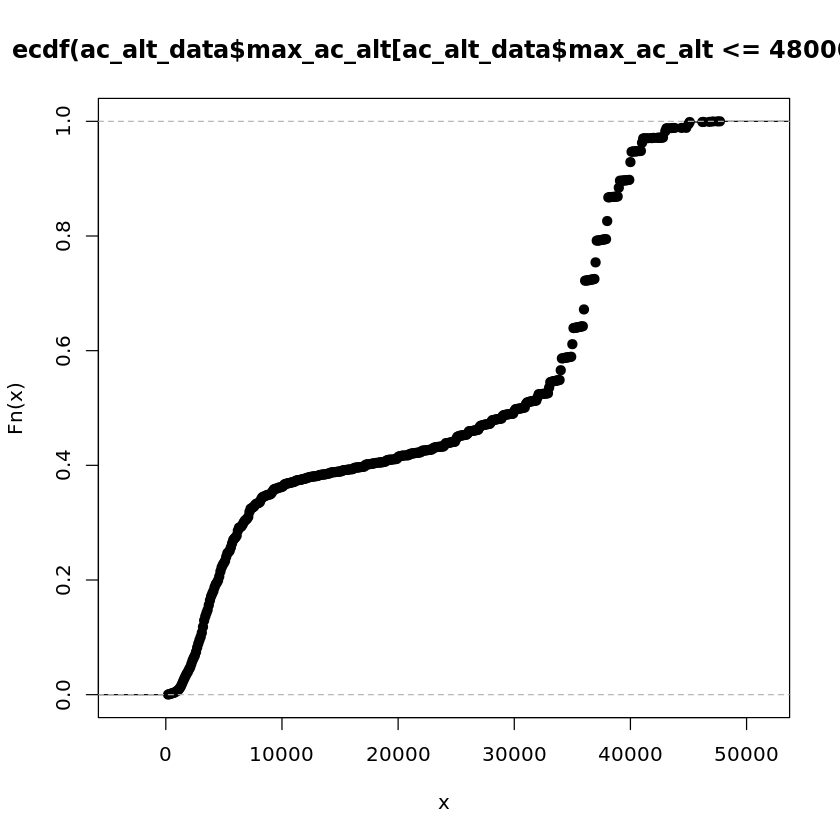

In [65]:
alt_ecdf <- ecdf(ac_alt_data$max_ac_alt[ac_alt_data$max_ac_alt <= 48000])
plot(alt_ecdf)

In [66]:
alt_ecdf(ac_alt_data$max_ac_alt[ac_alt_data$max_ac_alt <= 48000])

[1] 0.1954913096 0.9826191705 0.8261056617 0.5450869041 0.6719153330
    [6] 0.6719153330 0.9289278954 0.9289278954 0.9826191705 0.9289278954
   [11] 0.9289278954 0.9289278954 0.9289278954 0.8261056617 0.9826191705
   [16] 0.9289278954 0.6719153330 0.6113405610 0.6113405610 0.9289278954
   [21] 0.9289278954 0.5659094820 0.9289278954 0.9714334882 0.5488728274
   [26] 0.6393908105 0.5355360523 0.7919463087 0.9826191705 0.9289278954
   [31] 0.6719153330 0.6719153330 0.7220788160 0.6719153330 0.5450869041
   [36] 0.5450869041 0.6719153330 0.5659094820 0.6719153330 0.6719153330
   [41] 0.6719153330 0.5450869041 0.9289278954 0.9289278954 0.8976079849
   [46] 0.6393908105 0.6393908105 0.6393908105 0.5355360523 0.8673205989
   [51] 0.8673205989 0.8673205989 0.6393908105 0.8261056617 0.9289278954
   [56] 0.8261056617 0.9289278954 0.7540010325 0.5067114094 0.9998279126
   [61] 0.9877817932 0.9951815522 0.6719153330 0.7220788160 0.5450869041
   [66] 0.7540010325 0.4859748752 0.6719153330 0.6719153330 0.5185854414
   [71] 0.5096368955 0.6719153330 0.5659094820 0.0283944244 0.4239373602
   [76] 0.9289278954 0.9877817932 0.7919463087 0.7220788160 0.4521596971
   [81] 0.7540010325 0.6393908105 0.5005162623 0.7540010325 0.7919463087
   [86] 0.4815866460 0.7540010325 0.7540010325 0.8842712098 0.7220788160
   [91] 0.7919463087 0.7540010325 0.7919463087 0.7919463087 0.7919463087
   [96] 0.7540010325 0.4603338496 0.7540010325 0.9469110308 0.8965754603
  [101] 0.6719153330 0.8673205989 0.8261056617 0.8673205989 0.9626570298
  [106] 0.8673205989 0.7540010325 0.8965754603 0.9469110308 0.8842712098
  [111] 0.9877817932 0.9626570298 0.9626570298 0.8261056617 0.7919463087
  [116] 0.9479435553 0.8965754603 0.7919463087 0.8261056617 0.9626570298
  [121] 0.8261056617 0.5240922389 0.7540010325 0.7540010325 0.7540010325
  [126] 0.7540010325 0.4785751162 0.8261056617 0.8261056617 0.9469110308
  [131] 0.7220788160 0.7540010325 0.8965754603 0.8673205989 0.8673205989
  [136] 0.9289278954 0.3187919463 0.3337635519 0.8261056617 0.8261056617
  [141] 0.8673205989 0.9289278954 0.8261056617 0.7921183961 0.6113405610
  [146] 0.9289278954 0.9289278954 0.9469110308 0.8261056617 0.8673205989
  [151] 0.9289278954 0.9289278954 0.9289278954 0.8673205989 0.8673205989
  [156] 0.7919463087 0.9289278954 0.7250903459 0.7220788160 0.9289278954
  [161] 0.9289278954 0.9289278954 0.8676647737 0.8673205989 0.8261056617
  [166] 0.9469110308 0.9289278954 0.8673205989 0.9289278954 0.7220788160
  [171] 0.9289278954 0.6719153330 0.9289278954 0.9289278954 0.9289278954
  [176] 0.8261056617 0.6719153330 0.7919463087 0.8261056617 0.6719153330
  [181] 0.7220788160 0.6719153330 0.8261056617 0.7220788160 0.7220788160
  [186] 0.5659094820 0.7919463087 0.5659094820 0.8965754603 0.6719153330
  [191] 0.7220788160 0.4754775426 0.6719153330 0.5659094820 0.5355360523
  [196] 0.8261056617 0.6393908105 0.6719153330 0.8673205989 0.9826191705
  [201] 0.7220788160 0.8673205989 0.8261056617 0.8261056617 0.7540010325
  [206] 0.5249526760 0.6113405610 0.9469110308 0.9469110308 0.9469110308
  [211] 0.8842712098 0.9469110308 0.8965754603 0.9469110308 0.8965754603
  [216] 0.9289278954 0.9469110308 0.8679229048 0.9289278954 0.9469110308
  [221] 0.9469110308 0.9626570298 0.7540010325 0.6719153330 0.6393908105
  [226] 0.6393908105 0.6393908105 0.7540010325 0.5450869041 0.5659094820
  [231] 0.6113405610 0.7919463087 0.8261056617 0.9289278954 0.7540010325
  [236] 0.7540010325 0.7250903459 0.8673205989 0.7220788160 0.7919463087
  [241] 0.8673205989 0.8261056617 0.8673205989 0.6719153330 0.6113405610
  [246] 0.5659094820 0.8261056617 0.6393908105 0.7540010325 0.6719153330
  [251] 0.9289278954 0.8673205989 0.9877817932 0.9626570298 0.9289278954
  [256] 0.8673205989 0.8261056617 0.6719153330 0.8673205989 0.8261056617
  [261] 0.8261056617 0.8261056617 0.9289278954 0.9469110308 0.8261056617
  [266] 0.9289278954 0.9289278954 0.8261056617 0.9469110308 0.9289278954
  [271] 0.9469110308 0.9289278954 0.9289278954 0.8261056617 0.

In [67]:
x_df <- data.frame("ac_max_alt" = ac_alt_data$max_ac_alt[ac_alt_data$max_ac_alt <= 48000],
                   "ecdf_val" = alt_ecdf(ac_alt_data$max_ac_alt[ac_alt_data$max_ac_alt <= 48000]))

## Smoothing out the ECDF to obtain altitude (PDF) thresholds

In [68]:
mdl <- smooth.spline(x = unique(x_df)$ac_max_alt, y = unique(x_df)$ecdf_val, cv = 5)

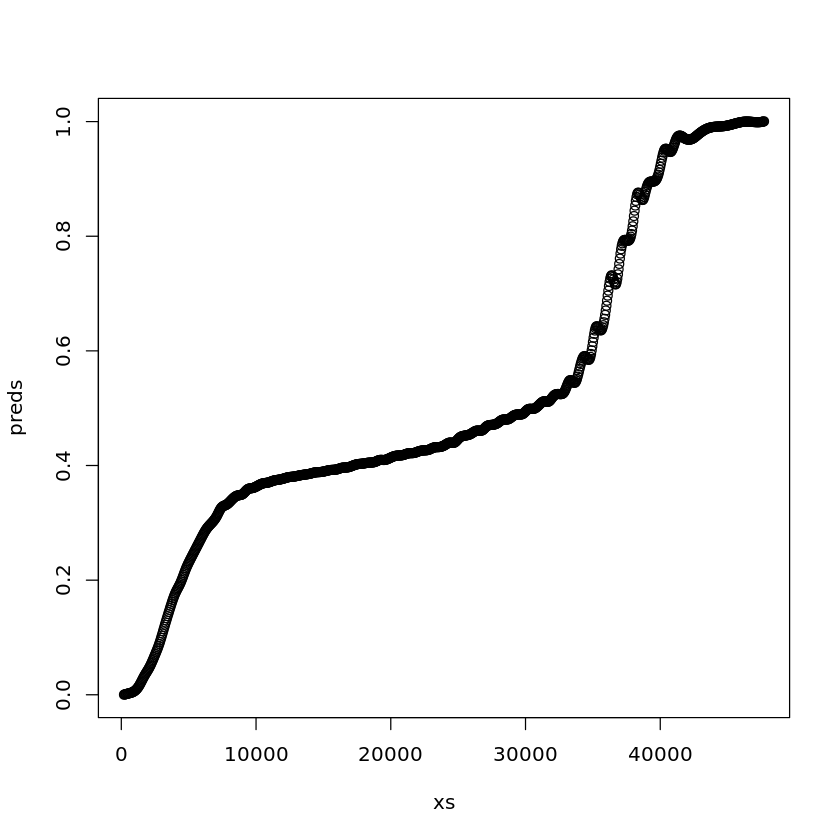

In [69]:
xs <- seq(from = min(x_df$ac_max_alt), to = max(x_df$ac_max_alt), length.out = 1000)
preds <- predict(mdl, xs)$y
plot(xs, preds)

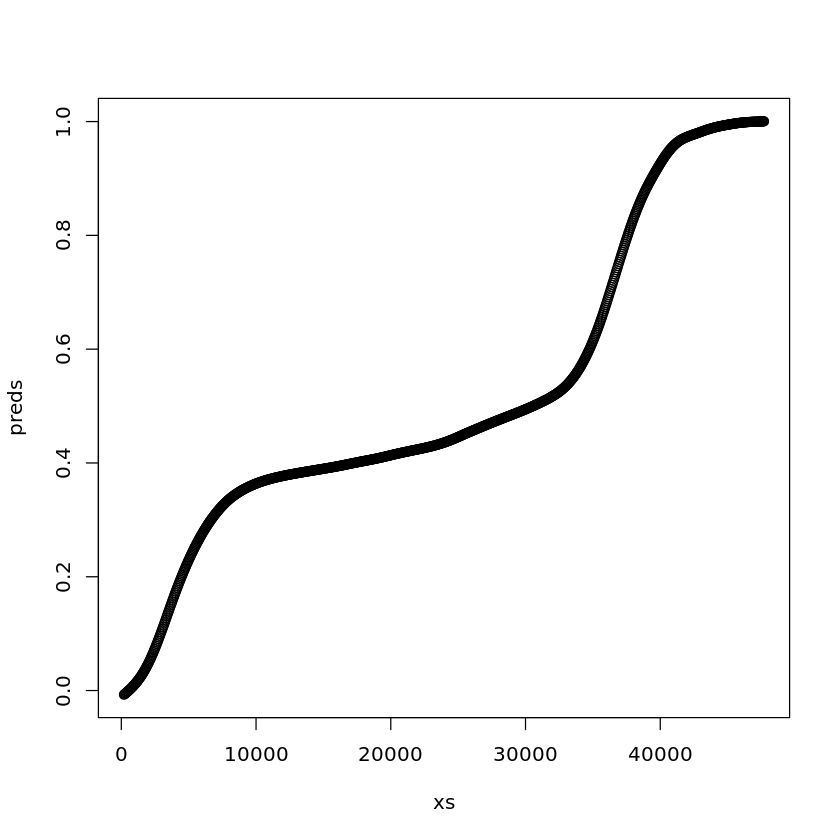

In [70]:
for(i in 1:10) {
    mdl <- smooth.spline(xs, preds, cv = 5)
    xs <- seq(from = min(xs), to = max(xs), length.out = 1000/10^(i %% 2))
    preds <- predict(mdl, xs)$y
}
plot(xs, preds)

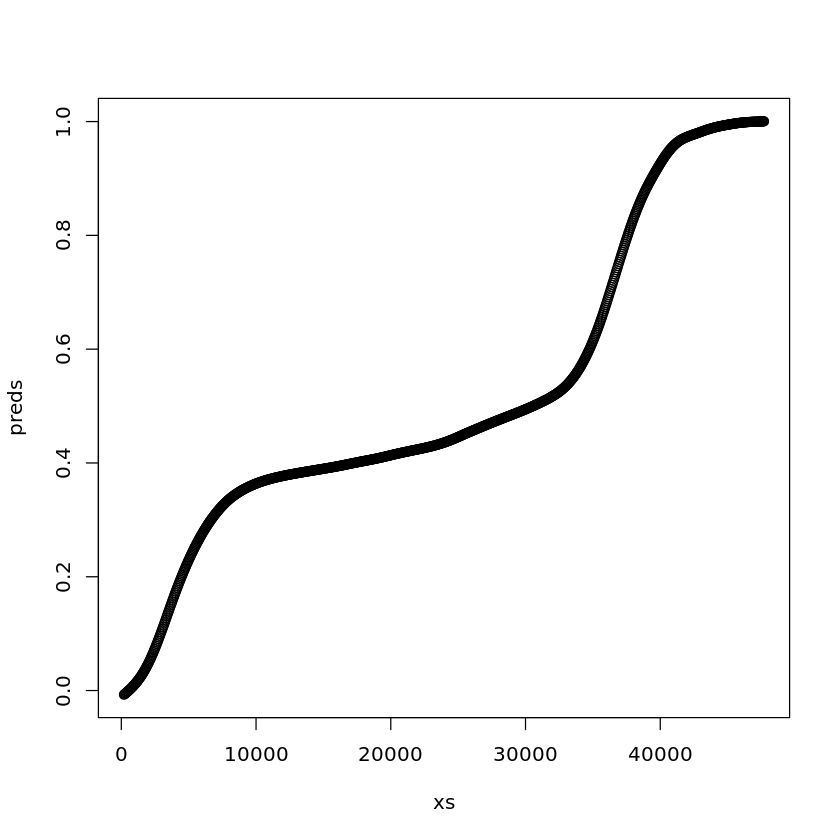

In [71]:
mdl <- smooth.spline(xs, preds, cv = 5, all.knots = T)
xs <- seq(from = min(xs), to = max(xs), length.out = 1000/10^(i %% 2))
preds <- predict(mdl, xs)$y
plot(xs, preds)

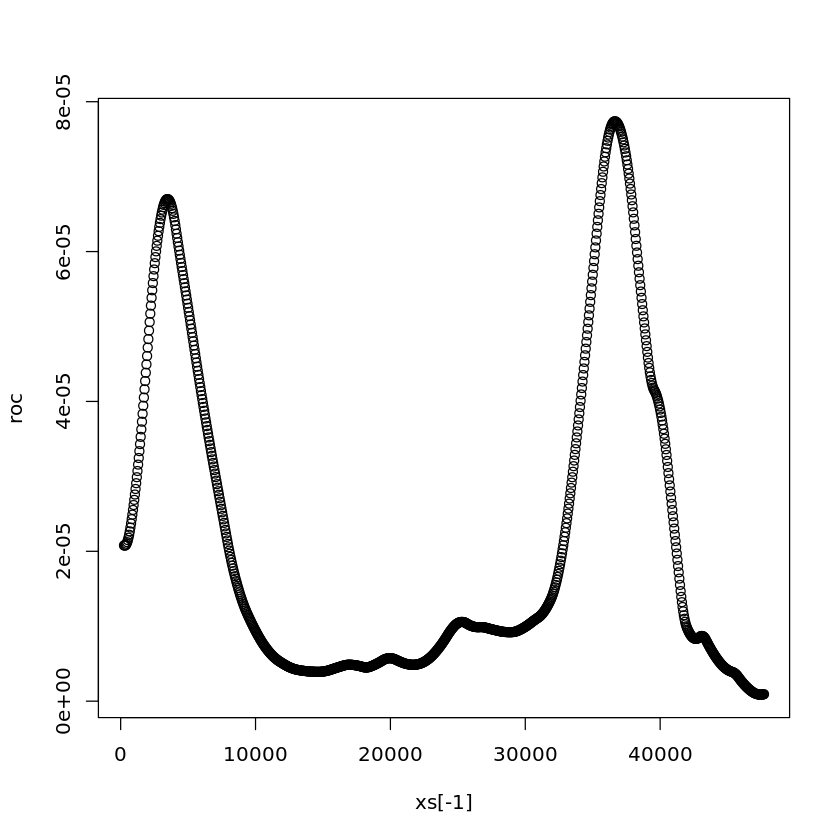

In [72]:
roc <- diff(preds)/diff(xs)
plot(xs[-1], roc)

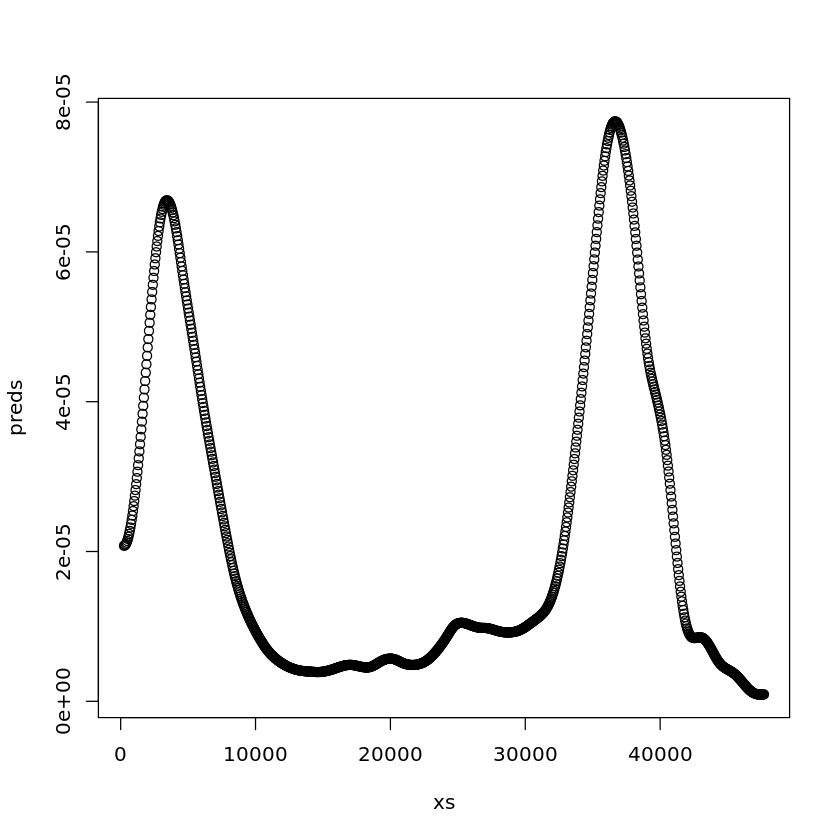

In [73]:
mdl <- smooth.spline(xs[-1], roc, cv = 5, all.knots = T)
xs <- seq(from = min(xs[-1]), to = max(xs[-1]), length.out = 1000/10^(i %% 2))
preds <- predict(mdl, xs)$y
for(i in 1:10) {
    mdl <- smooth.spline(xs, preds, cv = 5)
    xs <- seq(from = min(xs), to = max(xs), length.out = 1000/10^(i %% 2))
    preds <- predict(mdl, xs)$y
}
plot(xs, preds)

Warning message in diff(roc)/diff(xs):
“longer object length is not a multiple of shorter object length”


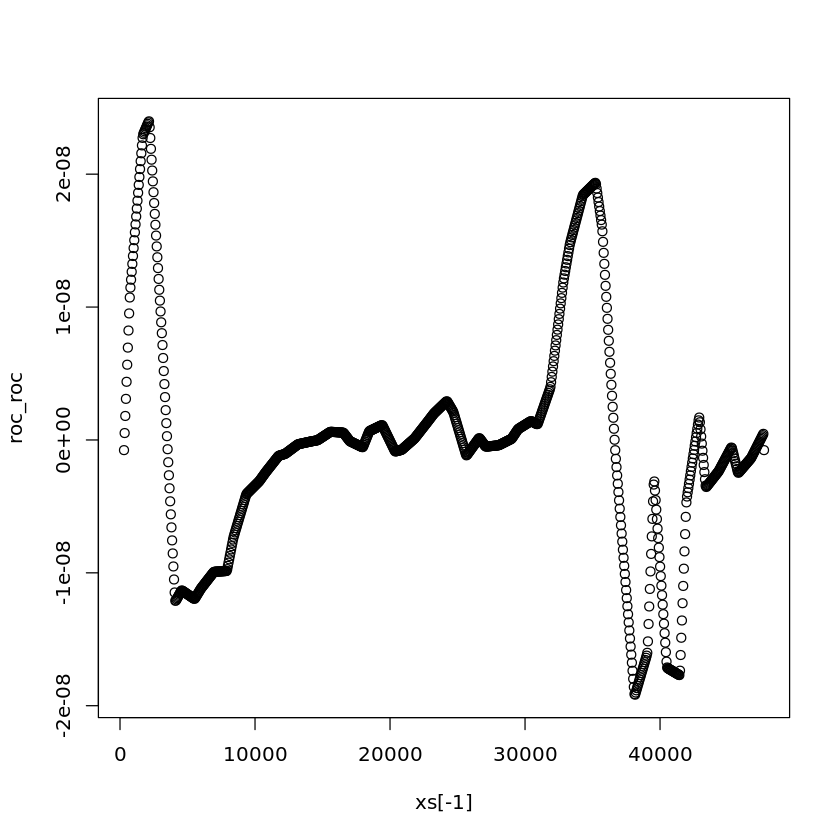

In [74]:
roc_roc <- diff(roc)/diff(xs)
plot(xs[-1], roc_roc)

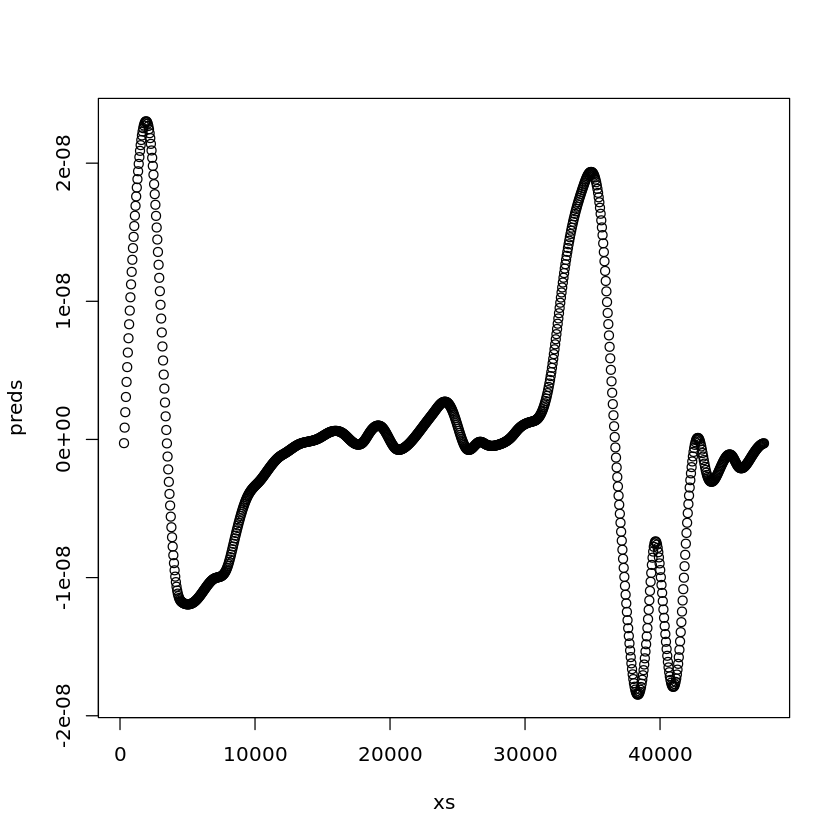

In [75]:
mdl <- smooth.spline(xs[-1], roc_roc, cv = 5, all.knots = T)
xs <- seq(from = min(xs[-1]), to = max(xs[-1]), length.out = 1000/10^(i %% 2))
preds <- predict(mdl, xs)$y
for(i in 1:10) {
    mdl <- smooth.spline(xs, preds, cv = 5)
    xs <- seq(from = min(xs), to = max(xs), length.out = 1000/10^(i %% 2))
    preds <- predict(mdl, xs)$y
}
plot(xs, preds)

In [76]:
c(length(roc_roc), length(xs))

[1]  999 1000

In [77]:
xs[roc_roc > 0 & xs > 10000][1]

Warning message in roc_roc > 0 & xs > 10000:
“longer object length is not a multiple of shorter object length”


[1] 14673.13

12000ft and 28000ft are good thresholds. Will check for outliers (aircraft higher than 48000ft)

In [78]:
setDT(ac_data)
ac_data[, c("max_ac_altitude") := list(max(altitude)), by = "aircraft"]

In [79]:
sum(ac_data$max_ac_altitude > 47000)

[1] 8818

# Always on ground (handled)

# Aircraft with only 2 distinct altitudes (handled)

In [80]:
num_uniq_x <- function(x) {
    return(length(unique(x)))
}

ac_data[, c("num_uniq_alt_id", "num_uniq_cluster") := list(num_uniq_x(altitude), num_uniq_x(id_cluster)), by = 'id']

In [81]:
colnames(ac_data)

[1] "aircraft"                     "ts"                          
 [3] "V1"                           "V2"                          
 [5] "lat"                          "lon"                         
 [7] "azimuth"                      "altitude"                    
 [9] "ground_speed"                 "V9"                          
[11] "V10"                          "aircraft_type"               
[13] "V12"                          "source"                      
[15] "destination"                  "V16"                         
[17] "ground_flag"                  "climb_rate"                  
[19] "V19"                          "V20"                         
[21] "V21"                          "ts_readable"                 
[23] "quadrant"                     "last_lat"                    
[25] "last_lon"                     "last_azimuth"                
[27] "last_altitude"                "last_ts"                     
[29] "last_source"                  "last_destination"            
[31] "last_V9"                      "last_ground_flag"            
[33] "last_quadrant"                "last_ground_speed"           
[35] "last_V2"                      "next_lat"                    
[37] "next_lon"                     "next_azimuth"                
[39] "next_altitude"                "next_ts"                     
[41] "next_source"                  "next_destination"            
[43] "next_V9"                      "next_ground_flag"            
[45] "next_quadrant"                "next_ground_speed"           
[47] "next_V2"                      "uniq_source"                 
[49] "uniq_destination"             "max_ac_alt"                  
[51] "last_ts_diff"                 "next_ts_diff"                
[53] "est_climb_rate"               "climb_rate_ratio"            
[55] "quadrant_change"              "touchdown_id"                
[57] "max_touchdown"                "max_altitude_touchdown_id"   
[59] "next_touchdown_ts"            "touchdown_time_diff"         
[61] "touchdown"                    "airport"                     
[63] "landed"                       "entered"                     
[65] "expired"                      "landed_or_entered_or_expired"
[67] "num_id"                       "id"                          
[69] "max_alt_ac_id"                "q99_alt_ac_id"               
[71] "max_99_ratio"                 "last_touchdown"              
[73] "next_touchdown"               "last_entered"                
[75] "next_entered"                 "last_airport"                
[77] "next_airport"                 "ts_scaled"                   
[79] "lon_scaled"                   "lat_scaled"                  
[81] "alt_scaled"                   "id_cluster"                  
[83] "max_ac_altitude"              "num_uniq_alt_id"             
[85] "num_uniq_cluster"             "most_frequent_altitude_1"    
[87] "most_frequent_altitude_2"     "num_ac_samples"              
[89] "num_ids"                      "num_alts"                    
[91] "num_id_clusters"

In [82]:
max(ac_data$altitude)

[1] 47100

Great, aircraft higher than 48000ft were removed while labeling

In [83]:
ac_sample_size = ac_data %>% group_by(aircraft) %>% summarize(num_samples = length(id), num_ids = length(unique(id)))
ac_sample_size <- ac_sample_size[order(ac_sample_size$num_samples, decreasing = F), ]
head(ac_sample_size)
tail(ac_sample_size)

aircraft,num_samples,num_ids
<chr>,<int>,<int>
A0D6CC,1,1
A0D7D8,1,1
A0DB82,1,1
A146D8,1,1
A2895C,1,1
A4713E,1,1


aircraft,num_samples,num_ids
<chr>,<int>,<int>
A7167F,12437,13
A15B77,12512,18
AA55EE,12815,17
A186AD,13562,20
A2B26B,14127,20
A3B09A,14244,21


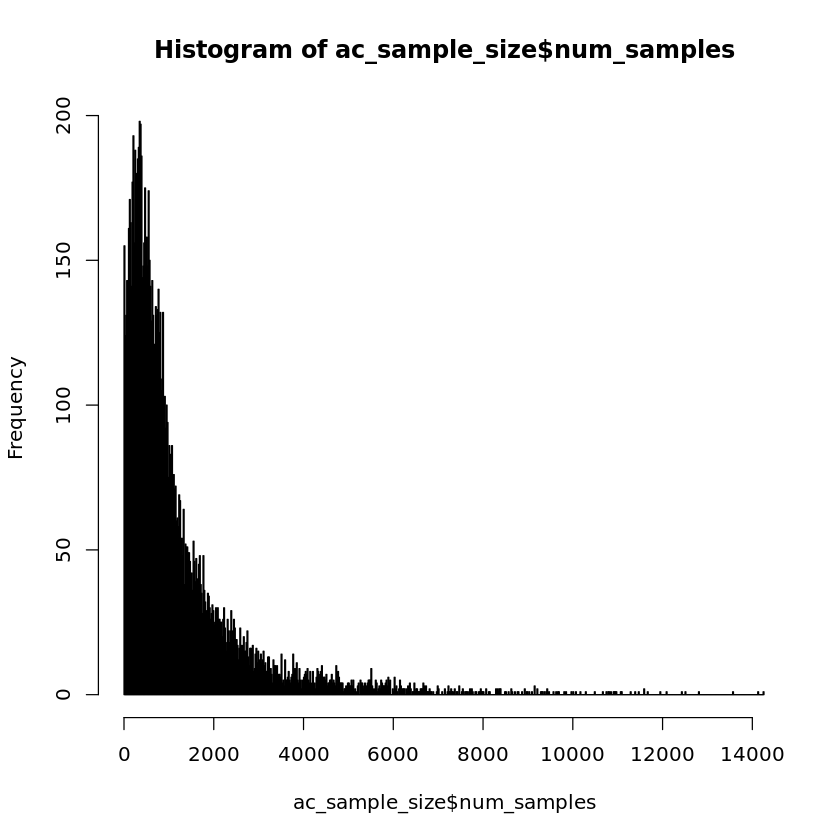

In [84]:
hist(ac_sample_size$num_samples, breaks = 1000)

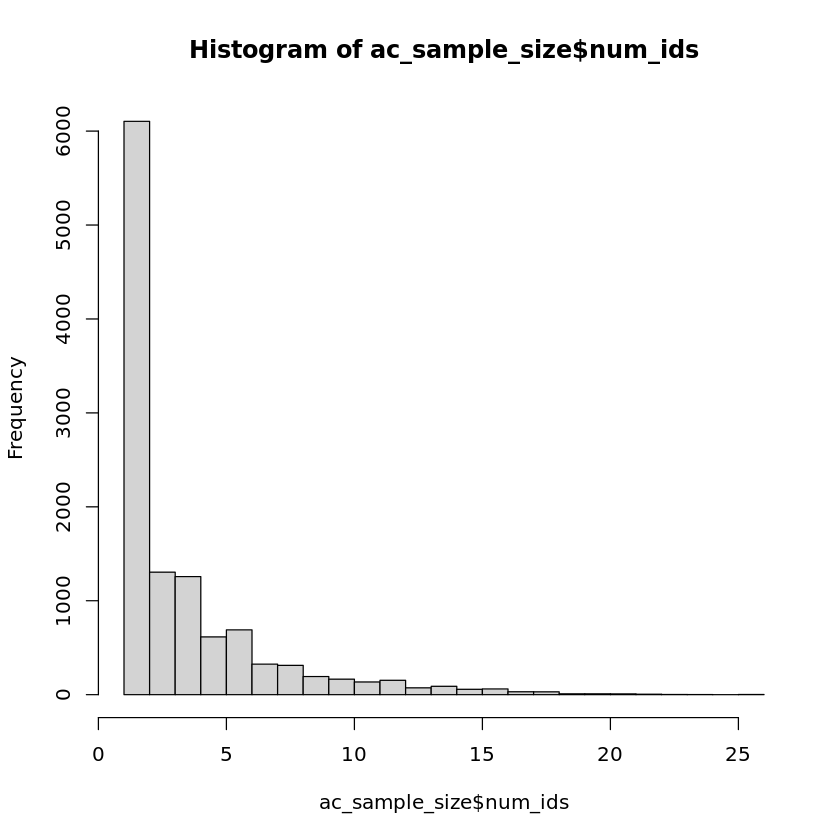

In [85]:
hist(ac_sample_size$num_ids, breaks = 26)

In [86]:
quantile(ac_sample_size$num_samples, c(0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1))

0%       1%       5%      10%      25%      50%      75%      90% 
    1.00    15.00    84.00   157.00   356.25   750.00  1505.75  2806.00 
     95%      99%     100% 
 4138.30  7228.26 14244.00

In [87]:
quantile(ac_sample_size$num_ids, c(0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1))

0%   1%   5%  10%  25%  50%  75%  90%  95%  99% 100% 
   1    1    1    1    2    2    5    8   11   16   26

In [88]:
ac_data[, c("num_ids", "num_alts", "num_id_clusters") := list(num_uniq_x(id), num_uniq_x(altitude), num_uniq_x(id_cluster)), by = "aircraft"]
multiple_id <- ac_data[ac_data$num_ids > 1, ]
one_id <- ac_data[ac_data$num_ids == 1, ]
c(nrow(one_id), nrow(multiple_id), nrow(ac_data))

[1]   938424 13266001 14204425

In [89]:
one_id_one_alt <- one_id[one_id$num_alts == 1, ]
one_id_two_alts <- one_id[one_id$num_alts == 2, ]
one_id_more_alts <- one_id[one_id$num_alts > 2, ]
one_id_one_alt[one_id_one_alt$num_id_clusters > 1, ]

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


aircraft,ts,V1,V2,lat,lon,azimuth,altitude,ground_speed,V9,⋯,id_cluster,max_ac_altitude,num_uniq_alt_id,num_uniq_cluster,most_frequent_altitude_1,most_frequent_altitude_2,num_ac_samples,num_ids,num_alts,num_id_clusters
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>


In [90]:
c(nrow(one_id_one_alt), nrow(one_id_two_alts), nrow(one_id_more_alts), nrow(one_id))

[1]  59693   4379 874352 938424

In [91]:
one_id_two_alts_summary <- one_id_two_alts[, .(num_samples_alt = length(id)), by=list(aircraft, altitude, id_cluster)]

In [92]:
max(one_id_two_alts_summary$id_cluster)

[1] 5

In [93]:
one_id_two_alts_summary <- dcast(one_id_two_alts_summary, aircraft + altitude ~ id_cluster)
one_id_two_alts_summary[is.na(one_id_two_alts_summary)] <- 0

head(one_id_two_alts_summary)

# reshape(one_id_two_alts_summary, idvar = "aircraft", timevar = "id_cluster", direction = "wide")

Using num_samples_alt as value column: use value.var to override.



,aircraft,altitude,0,1,2,3,4,5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A0561F,300,1,0,0,0,0,0
2,A0561F,400,8,5,0,0,0,0
3,A0EDFE,1800,3,0,0,0,0,0
4,A0EDFE,1900,3,9,0,0,0,0
5,A0F0D0,2000,6,0,0,0,0,0
6,A0F0D0,2100,3,0,0,0,0,0


In [94]:
non_zeros <- function(x) {
    return(sum(x!=0))
}

one_id_two_alts_summary$num_clusters <- apply(one_id_two_alts_summary[, -c(1, 2)], 1, non_zeros)
one_id_two_alts_summary$row_total <- rowSums(one_id_two_alts_summary[, -c(1, 2, ncol(one_id_two_alts_summary))])
# one_id_two_alts_summary <- one_id_two_alts_summary[, c(1, 2, ncol(one_id_two_alts_summary))]
setDT(one_id_two_alts_summary)
one_id_two_alts_summary[, c("num_rows_ac") := list(sum(row_total)), by = "aircraft"]
head(one_id_two_alts_summary)

aircraft,altitude,0,1,2,3,4,5,num_clusters,row_total,num_rows_ac
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
A0561F,300,1,0,0,0,0,0,1,1,14
A0561F,400,8,5,0,0,0,0,2,13,14
A0EDFE,1800,3,0,0,0,0,0,1,3,15
A0EDFE,1900,3,9,0,0,0,0,2,12,15
A0F0D0,2000,6,0,0,0,0,0,1,6,9
A0F0D0,2100,3,0,0,0,0,0,1,3,9


In [95]:
cluster_cols_bin <- rep(T, ncol(one_id_two_alts_summary))
non_cluster_cols <- c(1, 2, ncol(one_id_two_alts_summary)-2, ncol(one_id_two_alts_summary)-1, ncol(one_id_two_alts_summary))
cluster_cols_bin[non_cluster_cols] <- F

In [96]:
one_id_two_alts_summary <- data.frame(one_id_two_alts_summary)
one_id_two_alts_summary[, cluster_cols_bin] <- one_id_two_alts_summary[, cluster_cols_bin]/one_id_two_alts_summary$num_rows_ac
head(one_id_two_alts_summary)

,aircraft,altitude,X0,X1,X2,X3,X4,X5,num_clusters,row_total,num_rows_ac
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,A0561F,300,0.07142857,0.0000000,0,0,0,0,1,1,14
2,A0561F,400,0.57142857,0.3571429,0,0,0,0,2,13,14
3,A0EDFE,1800,0.20000000,0.0000000,0,0,0,0,1,3,15
4,A0EDFE,1900,0.20000000,0.6000000,0,0,0,0,2,12,15
5,A0F0D0,2000,0.66666667,0.0000000,0,0,0,0,1,6,9
6,A0F0D0,2100,0.33333333,0.0000000,0,0,0,0,1,3,9


In [97]:
one_id_two_alts_summary_row_perc <- one_id_two_alts_summary$row_total/one_id_two_alts_summary$num_rows_ac

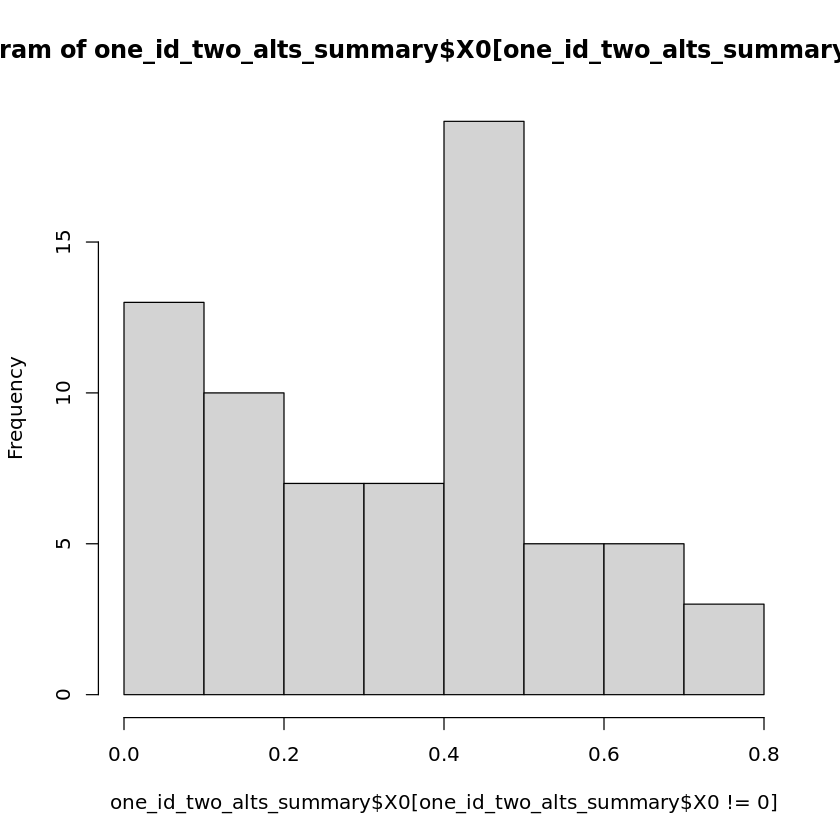

In [98]:
hist(one_id_two_alts_summary$X0[one_id_two_alts_summary$X0!=0])

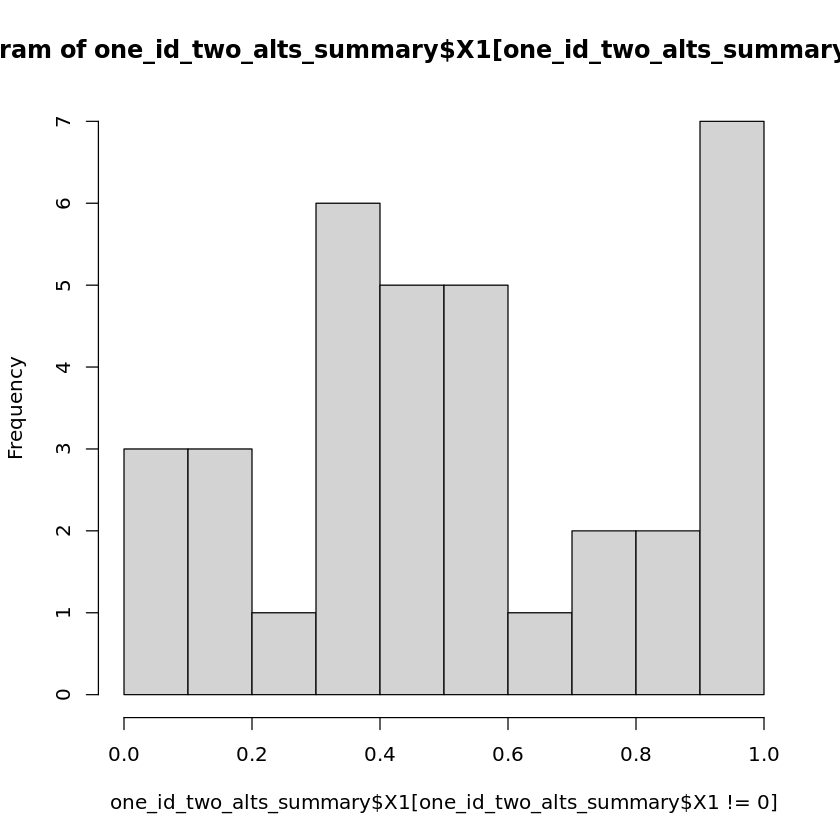

In [99]:
hist(one_id_two_alts_summary$X1[one_id_two_alts_summary$X1!=0])

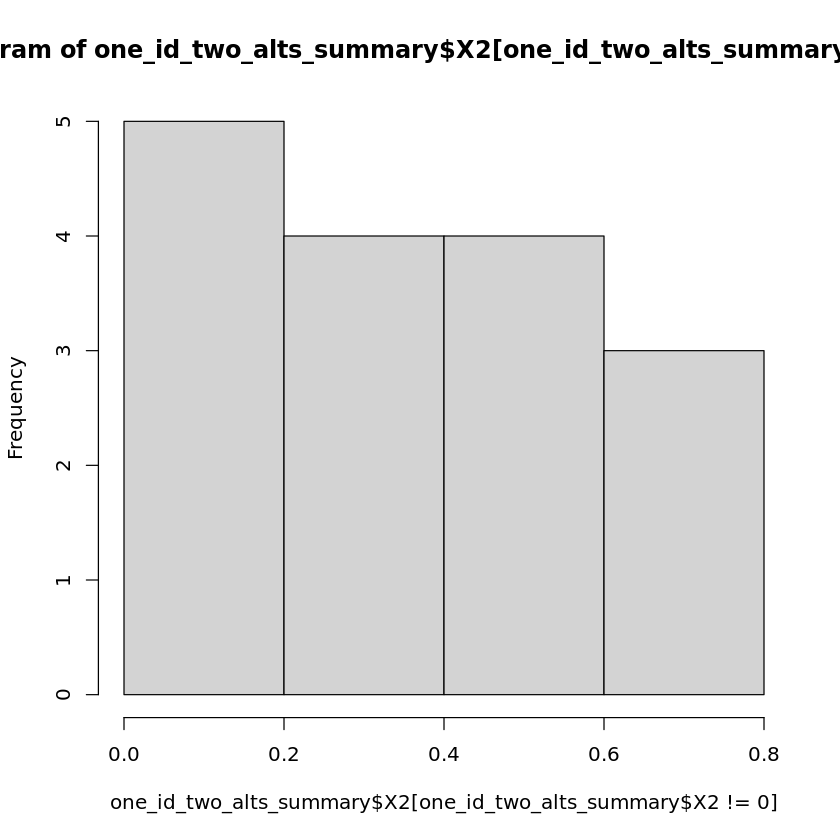

In [100]:
hist(one_id_two_alts_summary$X2[one_id_two_alts_summary$X2!=0])

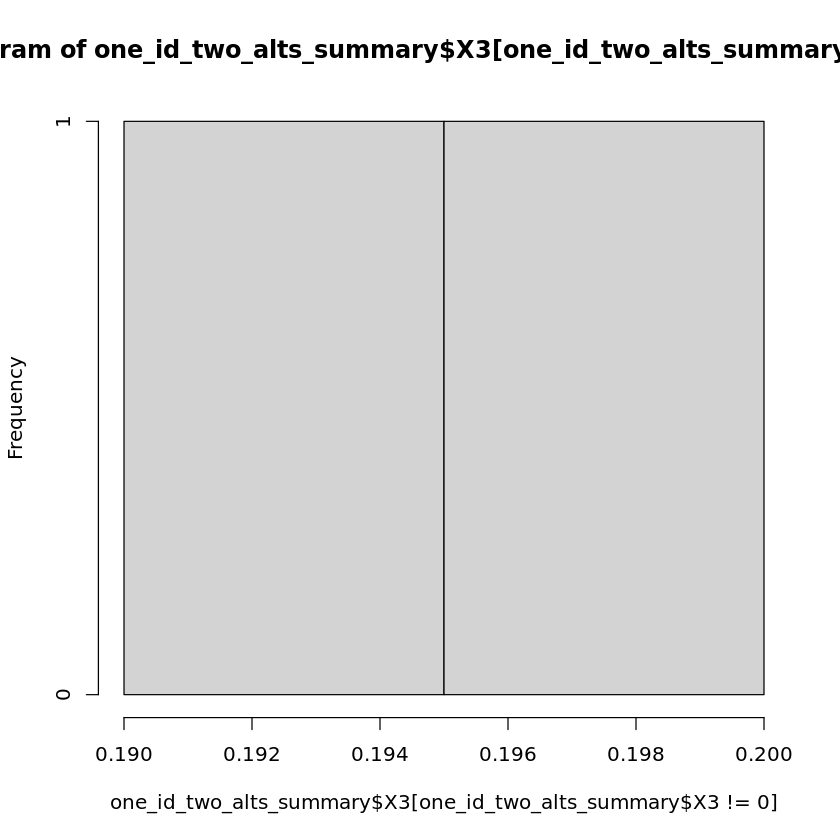

In [101]:
hist(one_id_two_alts_summary$X3[one_id_two_alts_summary$X3!=0])

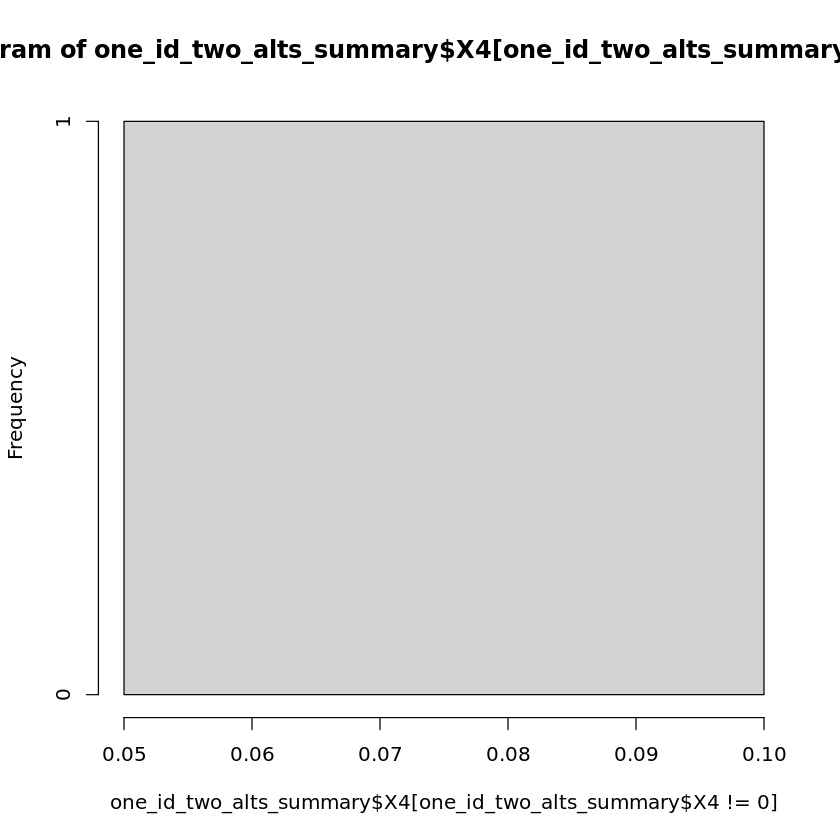

In [102]:
hist(one_id_two_alts_summary$X4[one_id_two_alts_summary$X4!=0])

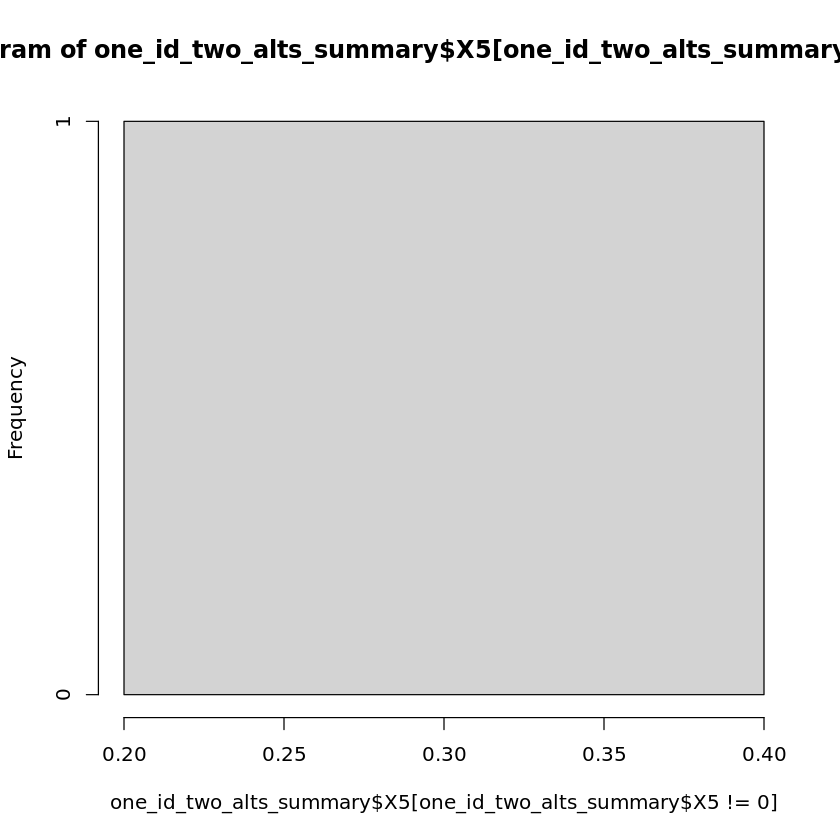

In [103]:
hist(one_id_two_alts_summary$X5[one_id_two_alts_summary$X5!=0])

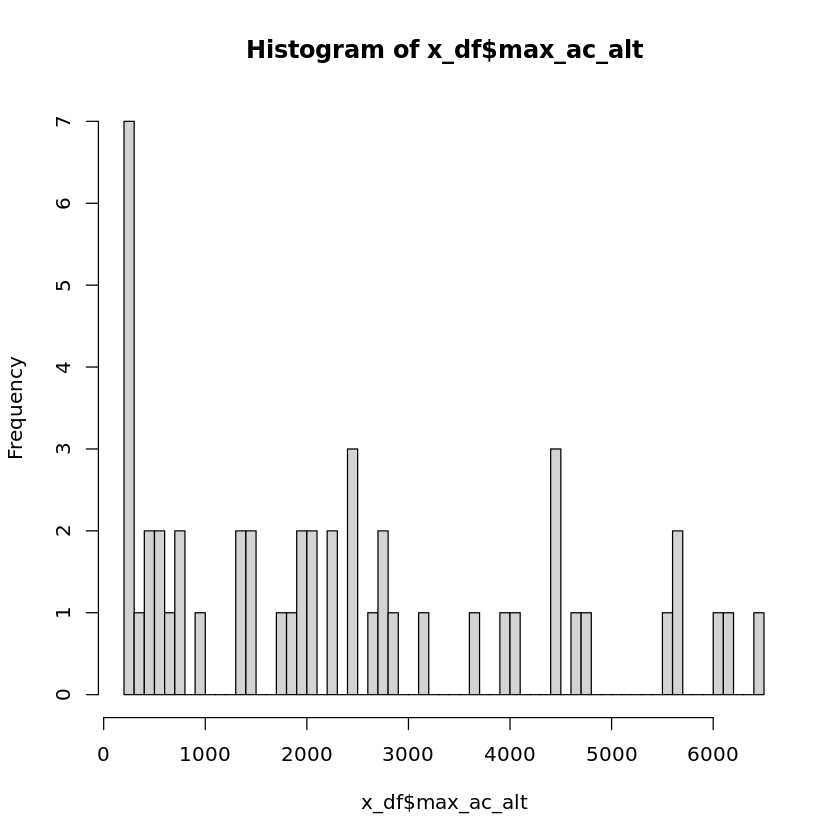

In [104]:
x_df <- one_id_two_alts_summary %>% group_by(aircraft) %>% summarize(max_ac_alt = max(altitude))
hist(x_df$max_ac_alt, breaks = 50)

Can't do much for the aircraft with altitude less than 10000ft

In [105]:
one_id_two_alts_summary_ <- merge(one_id_two_alts_summary, x_df[x_df$max_ac_alt > 10000, ])
other_summary_ <- merge(one_id_two_alts_summary, x_df[x_df$max_ac_alt <= 10000, ])
one_id_two_alts_summary_

aircraft,altitude,X0,X1,X2,X3,X4,X5,num_clusters,row_total,num_rows_ac,max_ac_alt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>


# Already preprocessed data of aircraft with just 2 altitudes, both over 10000ft

write_feather(ac_data, "full_ac_data.feather")

In [106]:
nrow(ac_data)

[1] 14204425

In [107]:
sum(c(3364622, 1481317, 1975087, 1409790, 896307, 965176, 780929, 560272, 559674, 481413, 367265, 363118, 319454, 272795, 254829, 223873, 184364, 177592, 144318, 115351, 116261, 95343, 73883, 68563, 60793, 47624, 41323, 31262, 24938, 21815, 14397, 14513, 10799, 8952, 4512, 6353, 2322, 4378, 2312, 1814, 395, 296, 345, 28, 59, 60, 1, 80))

[1] 15550967

Some rows got filtered out (some known reasons: very high altitude over 47000ft, always grounded, etc.), but it's ok

# Fitting splines for altitude vs ts for each id and saving the png

Maybe try to fit (lon, lat, altitude) vs ts? - either independently or simultaneously

In [113]:
cores <- detectCores() - 1

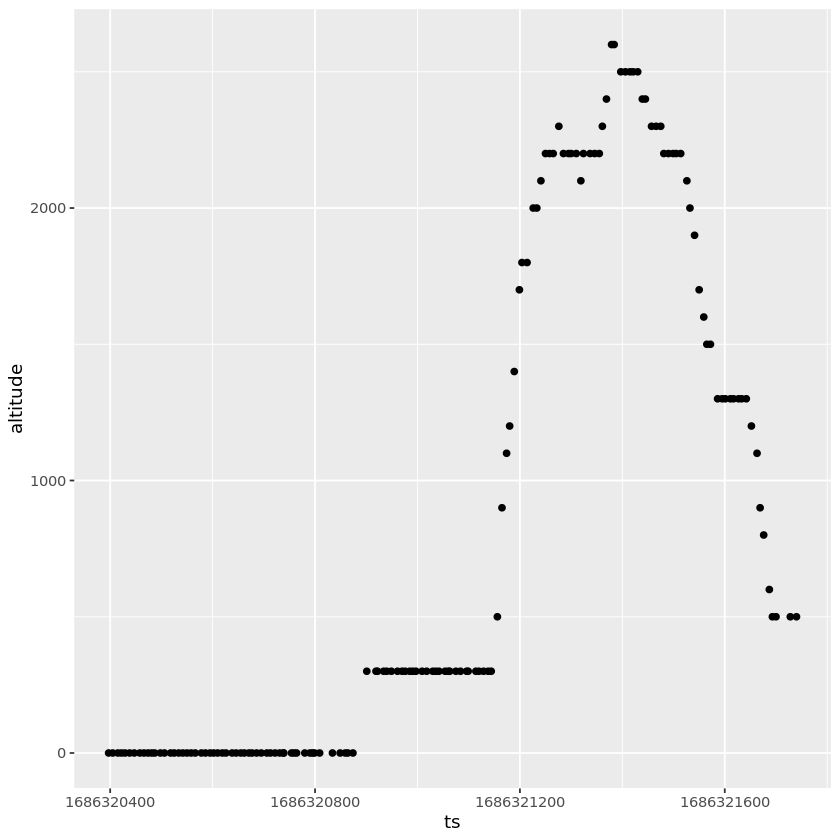

In [108]:
ac1_data <- ac_data[ac_data$id == ac_data$id[1], ]
ggplot(ac1_data) + geom_point(aes(x = ts, y = altitude))

In [109]:
rm(ac_data)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1963319,104.9,3111188,166.2,3111188,166.2
Vcells,1018210730,7768.4,2813061279,21462.0,1985301520,15146.7


lon vs ts

In [110]:
plot_ids_lon <- function(idx) {
    df__ <- read_feather(paste0("ac_data", idx, ".feather"))
    setwd("two_alt_ac")
    for(id in unique(df__$id)) {
        tryCatch({
            ac1_data1 <- df__[df__$id == id, ]
            mdl <- smooth.spline(x = ac1_data1$ts, y = ac1_data1$lon, cv = 5)
            preds <- predict(mdl, ac1_data1$ts)$y
            # plot(ac1_data$ts, preds)
            plot_df_ <- data.frame(x = ac1_data1$ts, y = preds)
            p <- ggplot() + geom_point(data = ac1_data1, aes(x = ts, y = lon)) + geom_line(data = plot_df_, aes(x = x, y = y))
            png(paste0(id, ".png"), width = 1366, height = 768)
            print(p)
            dev.off()
        }, error = function(e) NULL)
    }
    setwd("../")
}

In [ ]:
mclapply(1:cores, plot_ids_lon, mc.cores = cores)

lat vs ts

In [116]:
plot_ids_lat <- function(idx) {
    df__ <- read_feather(paste0("ac_data", idx, ".feather"))
    setwd("two_alt_ac")
    for(id in unique(df__$id)) {
        tryCatch({
            ac1_data1 <- df__[df__$id == id, ]
            mdl <- smooth.spline(x = ac1_data1$ts, y = ac1_data1$lat, cv = 5)
            preds <- predict(mdl, ac1_data1$ts)$y
            # plot(ac1_data$ts, preds)
            plot_df_ <- data.frame(x = ac1_data1$ts, y = preds)
            p <- ggplot() + geom_point(data = ac1_data1, aes(x = ts, y = lat)) + geom_line(data = plot_df_, aes(x = x, y = y))
            png(paste0(id, ".png"), width = 1366, height = 768)
            print(p)
            dev.off()
        }, error = function(e) NULL)
    }
    setwd("../")
}

In [117]:
mclapply(1:cores, plot_ids_lat, mc.cores = cores)

[[1]]
[1] "/home/jupyter/two_alt_ac"

[[2]]
[1] "/home/jupyter/two_alt_ac"

[[3]]
[1] "/home/jupyter/two_alt_ac"

[[4]]
[1] "/home/jupyter/two_alt_ac"

[[5]]
[1] "/home/jupyter/two_alt_ac"

[[6]]
[1] "/home/jupyter/two_alt_ac"

[[7]]
[1] "/home/jupyter/two_alt_ac"